# Import the Dependencies

In [1]:
# Import the dependecies
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

from joblib import dump
from datetime import datetime
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [3]:
from ydata_profiling import ProfileReport

# Project Customer Segmentation using K-Means Clustering

### Data Collection & Analysis

In [4]:
# Load the data from Mall_Customers.csv into Pandas Dataframe
customer_df = pd.read_csv('Mall_Customers.csv')

In [5]:
# First 10 rows of the data
customer_df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [11]:
# Find the number of rows and columns
customer_df.shape

(200, 5)

In [13]:
# gets the informations about the dataset
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [14]:
# Check for missing values
customer_df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

### Choosing the Annual Column & Spending Score Column

In [21]:
X = customer_df.iloc[:,[3,4]].values
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

### Choosing the number of clusters

WCSS -> Within Clusters Sum of Squares

In [22]:
# Finding WCSS value for different number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

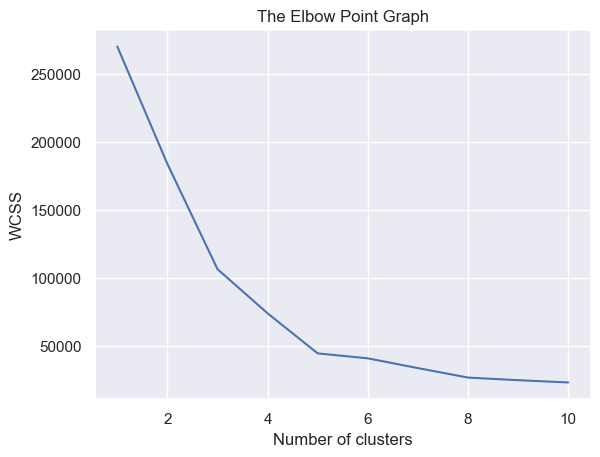

In [23]:
# plot an elbow graph
sns.set()
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Optimum Number of Clusters: 5

In [24]:
# Training the K-Means Clustering Model
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)

# Return a label for each data point based on their cluster
y = kmeans.fit_predict(X)

print(y)

[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 0 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 0 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


### Visualizing all the Clusters

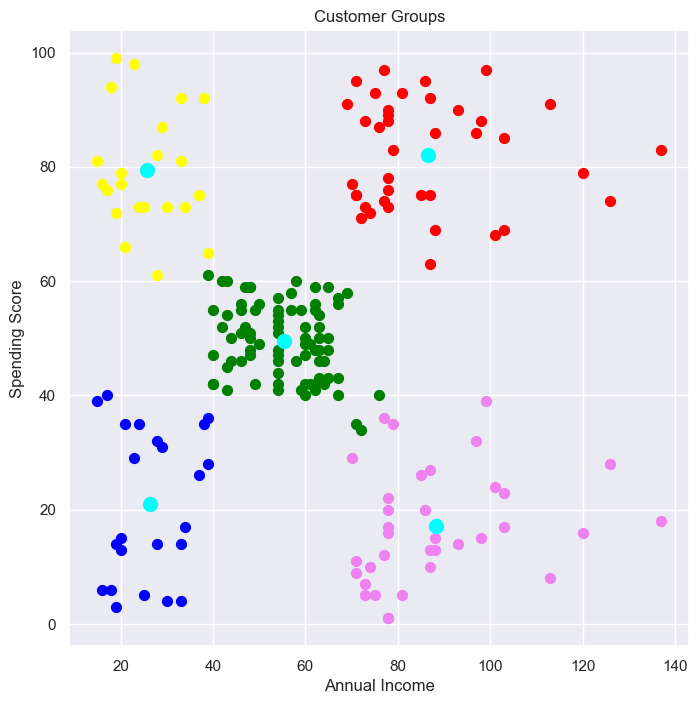

In [26]:
# Plotting all the clusters and their Centroid
plt.figure(figsize=(8,8))
plt.scatter(X[y==0,0], X[y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(X[y==1,0], X[y==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(X[y==2,0], X[y==2,1], s=50, c='yellow', label='Cluster 3')
plt.scatter(X[y==3,0], X[y==3,1], s=50, c='violet', label='Cluster 4')
plt.scatter(X[y==4,0], X[y==4,1], s=50, c='blue', label='Cluster 5')

# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

# Superstore Customer Segmentation

## 1. Data Understanding and Preprocessing

In [18]:
df2 = pd.read_csv('superstore_datasets_pst.csv')
df2.head()

,order_id,gmv,profit,quantity,category,sub_category,cost,total_gmv,total_cost,total_profit,order_date,customer_name,city,country,region,segment,ship_date,ship_mode,lon,lat
0,AZ-2011-252578,39,10,6,Office Supplies,Binders,29,234,29,60,2011-04-21,Sebastian McClelland,Elx,Spain,South,Consumer,2011-04-26,Economy,-0.712561,38.269933
1,AZ-2014-9539724,485,199,4,Office Supplies,Storage,286,1940,286,796,2014-08-29,Alice Currie,Elx,Spain,South,Consumer,2014-09-03,Economy,-0.712561,38.269933
2,AZ-2011-252578,444,89,4,Technology,Phones,355,1776,355,356,2011-04-21,Sebastian McClelland,Elx,Spain,South,Consumer,2011-04-26,Economy,-0.712561,38.269933
3,AZ-2013-503783,299,116,4,Office Supplies,Appliances,183,1196,183,464,2013-01-01,Freddie Kaur,Pau,France,Central,Consumer,2013-01-01,Immediate,-0.370797,43.295100
4,AZ-2014-1861968,232,85,3,Office Supplies,Appliances,147,696,147,255,2014-05-07,Mark Westfall,Pau,France,Central,Consumer,2014-05-11,Economy,-0.370797,43.295100


In [66]:
# Check the data types of each column
print(f"Check the data types of each column")
df2.info()

Check the data types of each column
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5870 entries, 0 to 5869
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   order_id       5870 non-null   object 
 1   gmv            5870 non-null   int64  
 2   profit         5870 non-null   int64  
 3   quantity       5870 non-null   int64  
 4   category       5870 non-null   object 
 5   sub_category   5870 non-null   object 
 6   cost           5870 non-null   int64  
 7   total_gmv      5870 non-null   int64  
 8   total_cost     5870 non-null   int64  
 9   total_profit   5870 non-null   int64  
 10  order_date     5870 non-null   object 
 11  customer_name  5870 non-null   object 
 12  city           5870 non-null   object 
 13  country        5870 non-null   object 
 14  region         5870 non-null   object 
 15  segment        5870 non-null   object 
 16  ship_date      5870 non-null   object 
 17  ship_mode      5

In [70]:
df2.head()

,order_id,gmv,profit,quantity,category,sub_category,cost,total_gmv,total_cost,total_profit,order_date,customer_name,city,country,region,segment,ship_date,ship_mode,lon,lat
0,AZ-2011-252578,39,10,6,Office Supplies,Binders,29,234,29,60,2011-04-21,Sebastian McClelland,Elx,Spain,South,Consumer,2011-04-26,Economy,-0.712561,38.269933
1,AZ-2014-9539724,485,199,4,Office Supplies,Storage,286,1940,286,796,2014-08-29,Alice Currie,Elx,Spain,South,Consumer,2014-09-03,Economy,-0.712561,38.269933
2,AZ-2011-252578,444,89,4,Technology,Phones,355,1776,355,356,2011-04-21,Sebastian McClelland,Elx,Spain,South,Consumer,2011-04-26,Economy,-0.712561,38.269933
3,AZ-2013-503783,299,116,4,Office Supplies,Appliances,183,1196,183,464,2013-01-01,Freddie Kaur,Pau,France,Central,Consumer,2013-01-01,Immediate,-0.370797,43.295100
4,AZ-2014-1861968,232,85,3,Office Supplies,Appliances,147,696,147,255,2014-05-07,Mark Westfall,Pau,France,Central,Consumer,2014-05-11,Economy,-0.370797,43.295100


In [65]:
# Check for missing values
print(f"Check for missing values")
df2.isnull().sum()

Check for missing values


order_id         0
gmv              0
profit           0
quantity         0
category         0
sub_category     0
cost             0
total_gmv        0
total_cost       0
total_profit     0
order_date       0
customer_name    0
city             0
country          0
region           0
segment          0
ship_date        0
ship_mode        0
lon              0
lat              0
dtype: int64

In [67]:
# Summary statistics for numeric columns
print("Summary statistics for numeric columns")
df2.describe()

Summary statistics for numeric columns


,gmv,profit,quantity,cost,total_gmv,total_cost,total_profit,lon,lat
count,5870.000000,5870.000000,5870.000000,5870.000000,5870.000000,5870.000000,5870.000000,5870.000000,5870.000000
mean,318.374617,75.726405,4.064225,228.157240,1753.350256,242.648211,413.631175,4.983506,48.267877
std,524.442728,158.821032,2.530536,383.403697,4348.476566,402.642226,1248.380987,6.260940,4.809769
min,4.000000,0.000000,1.000000,3.000000,4.000000,3.000000,0.000000,-9.139337,35.292277
25%,54.000000,9.000000,2.000000,37.000000,153.000000,40.000000,24.000000,-0.376288,44.801485
50%,131.500000,26.000000,3.000000,89.000000,468.000000,97.000000,88.000000,4.805528,48.886727
75%,339.000000,72.000000,5.000000,241.000000,1491.750000,258.000000,312.000000,9.225687,51.507351
max,6517.000000,2476.000000,20.000000,5665.000000,80206.000000,5665.000000,29712.000000,26.945940,60.794533


In [19]:
# Check for duplicates
print("Check for duplicates")
df2.duplicated().sum()

Check for duplicates


np.int64(8)

In [20]:
df3 = df2.copy()
df3.head()

,order_id,gmv,profit,quantity,category,sub_category,cost,total_gmv,total_cost,total_profit,order_date,customer_name,city,country,region,segment,ship_date,ship_mode,lon,lat
0,AZ-2011-252578,39,10,6,Office Supplies,Binders,29,234,29,60,2011-04-21,Sebastian McClelland,Elx,Spain,South,Consumer,2011-04-26,Economy,-0.712561,38.269933
1,AZ-2014-9539724,485,199,4,Office Supplies,Storage,286,1940,286,796,2014-08-29,Alice Currie,Elx,Spain,South,Consumer,2014-09-03,Economy,-0.712561,38.269933
2,AZ-2011-252578,444,89,4,Technology,Phones,355,1776,355,356,2011-04-21,Sebastian McClelland,Elx,Spain,South,Consumer,2011-04-26,Economy,-0.712561,38.269933
3,AZ-2013-503783,299,116,4,Office Supplies,Appliances,183,1196,183,464,2013-01-01,Freddie Kaur,Pau,France,Central,Consumer,2013-01-01,Immediate,-0.370797,43.295100
4,AZ-2014-1861968,232,85,3,Office Supplies,Appliances,147,696,147,255,2014-05-07,Mark Westfall,Pau,France,Central,Consumer,2014-05-11,Economy,-0.370797,43.295100


In [21]:
# Assuming df3 is your existing DataFrame

# Convert 'order_id', 'category', 'sub_category', 'customer_name', 'city', 'country', 'region', 'segment' to string
string_columns = ['order_id', 'category', 'sub_category', 'customer_name', 'city', 'country', 'region', 'segment']
df3[string_columns] = df3[string_columns].astype('string')

# Convert 'gmv', 'profit', 'cost', 'total_gmv', 'total_cost', 'total_profit' to decimal or float64
decimal_columns = ['gmv', 'profit', 'cost', 'total_gmv', 'total_cost', 'total_profit']
df3[decimal_columns] = df3[decimal_columns].astype('float64')

# Convert 'quantity' to integer (if applicable)
df3['quantity'] = df3['quantity'].astype('int')

# Convert 'order_date' and 'ship_date' to datetime
df3['order_date'] = pd.to_datetime(df3['order_date'], errors='coerce')
df3['ship_date'] = pd.to_datetime(df3['ship_date'], errors='coerce')

# Convert 'lon' and 'lat' to float (double in Hive)
df3[['lon', 'lat']] = df3[['lon', 'lat']].astype('float64')

# Verify datatypes
print(df3.dtypes)

order_id         string[python]
gmv                     float64
profit                  float64
quantity                  int64
category         string[python]
sub_category     string[python]
cost                    float64
total_gmv               float64
total_cost              float64
total_profit            float64
order_date       datetime64[ns]
customer_name    string[python]
city             string[python]
country          string[python]
region           string[python]
segment          string[python]
ship_date        datetime64[ns]
ship_mode                object
lon                     float64
lat                     float64
dtype: object


In [74]:
print(df3.head())
print(df2.head())

          order_id    gmv  profit  quantity         category sub_category  \
0   AZ-2011-252578   39.0    10.0         6  Office Supplies      Binders   
1  AZ-2014-9539724  485.0   199.0         4  Office Supplies      Storage   
2   AZ-2011-252578  444.0    89.0         4       Technology       Phones   
3   AZ-2013-503783  299.0   116.0         4  Office Supplies   Appliances   
4  AZ-2014-1861968  232.0    85.0         3  Office Supplies   Appliances   

    cost  total_gmv  total_cost  total_profit order_date  \
0   29.0      234.0        29.0          60.0 2011-04-21   
1  286.0     1940.0       286.0         796.0 2014-08-29   
2  355.0     1776.0       355.0         356.0 2011-04-21   
3  183.0     1196.0       183.0         464.0 2013-01-01   
4  147.0      696.0       147.0         255.0 2014-05-07   

          customer_name city country   region   segment  ship_date  ship_mode  \
0  Sebastian McClelland  Elx   Spain    South  Consumer 2011-04-26    Economy   
1          Ali

In [75]:
df2.to_csv("df2.csv", index=False)
df3.to_csv("df3.csv", index=False)

In [86]:
df3.columns

Index(['order_id', 'gmv', 'profit', 'quantity', 'category', 'sub_category',
       'cost', 'total_gmv', 'total_cost', 'total_profit', 'order_date',
       'customer_name', 'city', 'country', 'region', 'segment', 'ship_date',
       'ship_mode', 'lon', 'lat'],
      dtype='object')

In [89]:
df3[['gmv','profit', 'total_gmv', 'total_profit']][:2]

,gmv,profit,total_gmv,total_profit
0,39.0,10.0,234.0,60.0
1,485.0,199.0,1940.0,796.0


### Step 1.5: Feature Engineering

Now we’ll create additional features that can help us in the segmentation process. We will calculate metrics like Customer Lifetime Value (CLV), Recency, Frequency, and Monetary value.

- Recency: Days since the last order.
- Frequency: Number of orders per customer.
- Monetary: Total profit generated by a customer.

In [16]:
df3 = pd.read_csv('df3.csv')
df3.head()

,order_id,gmv,profit,quantity,category,sub_category,cost,total_gmv,total_cost,total_profit,order_date,customer_name,city,country,region,segment,ship_date,ship_mode,lon,lat
0,AZ-2011-252578,39.0,10.0,6,Office Supplies,Binders,29.0,234.0,29.0,60.0,2011-04-21,Sebastian McClelland,Elx,Spain,South,Consumer,2011-04-26,Economy,-0.712561,38.269933
1,AZ-2014-9539724,485.0,199.0,4,Office Supplies,Storage,286.0,1940.0,286.0,796.0,2014-08-29,Alice Currie,Elx,Spain,South,Consumer,2014-09-03,Economy,-0.712561,38.269933
2,AZ-2011-252578,444.0,89.0,4,Technology,Phones,355.0,1776.0,355.0,356.0,2011-04-21,Sebastian McClelland,Elx,Spain,South,Consumer,2011-04-26,Economy,-0.712561,38.269933
3,AZ-2013-503783,299.0,116.0,4,Office Supplies,Appliances,183.0,1196.0,183.0,464.0,2013-01-01,Freddie Kaur,Pau,France,Central,Consumer,2013-01-01,Immediate,-0.370797,43.295100
4,AZ-2014-1861968,232.0,85.0,3,Office Supplies,Appliances,147.0,696.0,147.0,255.0,2014-05-07,Mark Westfall,Pau,France,Central,Consumer,2014-05-11,Economy,-0.370797,43.295100


1. Recency (R): How recently did a particular customer make a purchase?
Recency mengukur seberapa baru seorang pelanggan melakukan pembelian. Hal ini memberikan informasi tentang kapan terakhir kali pelanggan tersebut bertransaksi dengan perusahaan.

2. Frequency (F): How often do they make purchases?
Frequency mengukur seberapa sering seorang pelanggan melakukan pembelian dalam suatu periode waktu tertentu.

3. Monetary Value (M): How much money do they spend?
Monetary mengukur total uang yang dihabiskan oleh pelanggan dalam periode tertentu.

In [47]:
# Utk cek dtype tiap kolom apakah object
# df3.info()

### Hitung Recency (R)

In [11]:
# Tanggal terbesar/terakhir di order_date
max(df3['order_date'])

'2014-12-31'

In [45]:
# Hitung Recency (R) - 
reference_date = pd.to_datetime('2015-01-01')
# Hitung recency: Selisih antara tanggal referensi dengan tanggal pembelian terakhir setiap customer
df_r = df3.groupby('customer_name') \
        .agg({'order_date': lambda x: (reference_date - x.max()) \
        .days}) \
        .reset_index() \
        .sort_values(by='order_date', ascending=True)

# Alur kerja code:
# 1. df3 digroup by nama customer
# 2. dicari order_date terbesar/terakhir dari setiap nama customer
# 3. tanggal acuan dikurang dengan tanggal terakhir customer bertransaksi 
# 4. dapet banyak hari (makin kecil makin bagus)
# 5. reset index df

# Rename kolom "order_date" -> "recency"
df_r.columns = ['customer_name', 'recency']
df_r

,customer_name,recency
463,Leon Barnes,1
387,Jose Gambino,1
642,Rebecca Chamberlain,1
216,Eloise Sykes,1
238,Evie Morton,1
...,...,...
281,Harold Smith,1289
753,Tyler Whitehead,1310
464,Leon Thompson,1311
370,Jodie Garner,1344


### Hitung Frequency (F)

In [46]:
# Hitung Frequency (F) - Banyak order per customer
df_f = df3.groupby(['customer_name'])['order_id'] \
        .count() \
        .reset_index() \
        .sort_values(by='order_id', ascending=False)
# Rename kolom order_id -> frequency
df_f.columns = ['customer_name', 'frequency']
df_f

,customer_name,frequency
387,Jose Gambino,26
375,Joel Peters,24
653,Rita McCann,22
49,Angie Massengill,22
350,Jasmine Slater,21
...,...,...
726,Tegan Savage,1
81,Bella Handfield,1
464,Leon Thompson,1
7,Abby Muramats,1


### Hitung Monetary (M)

In [75]:
# Cek profit dengan total_profit, cost dengan total_cost apakah memang sama nilainya?
# df3.groupby('customer_name')[['profit', 'total_profit', 'cost', 'total_cost']] \
#     .sum() \
#     .reset_index()

In [77]:
# Hitung Monetary (M) - Total cost per customer
df_m = df3.groupby('customer_name')['total_cost'] \
    .sum() \
    .reset_index() \
    .sort_values(by='total_cost', ascending=False)
# rename kolom "total_cost" -> "monetary"
df_m.columns = ['customer_name', 'monetary']
df_m

,customer_name,monetary
49,Angie Massengill,11092.0
494,Lola Hughes,8258.0
70,Ashton Charles,8216.0
764,Walter Coley,8085.0
628,Philip Newsom,7915.0
...,...,...
342,James Fleming,25.0
576,Molly Hawkins,18.0
275,Grace Brown,16.0
370,Jodie Garner,16.0


In [42]:
# Mencari banyak customer name yg unik / count distinct customer_name
df3['customer_name'].nunique()

787

In [78]:
# df3.head()

In [62]:
df_m

,customer_name,monetary
49,Angie Massengill,11092.0
494,Lola Hughes,8258.0
70,Ashton Charles,8216.0
764,Walter Coley,8085.0
628,Philip Newsom,7915.0
...,...,...
342,James Fleming,25.0
576,Molly Hawkins,18.0
275,Grace Brown,16.0
370,Jodie Garner,16.0


In [79]:
# Menggabungkan tabel RFM berdasarkan customer_name
df_rfm = df_r \
        .merge(df_f, on='customer_name') \
        .merge(df_m, on='customer_name')

# Tampilkan hasil penggabungan
df_rfm.sort_values('customer_name')

,customer_name,recency,frequency,monetary
520,Aaron Bootman,253,19,3272.0
492,Aaron Cunningham,212,12,1612.0
719,Aaron Davey,637,6,1525.0
779,Aaron Macrossan,1200,1,40.0
274,Abbie Perry,98,8,1070.0
...,...,...,...,...
323,Zara Loton,117,4,1174.0
46,Zara Money,13,11,1902.0
436,Zoe Lanigan,174,4,906.0
23,Zoe Lowin,6,8,1475.0


## K-Means Clustering

In [82]:
# 1. Persiapkan Data RFM (hilangkan nama pelanggan)
X = df_rfm[['recency', 'frequency', 'monetary']]
X

,recency,frequency,monetary
0,1,9,2303.0
1,1,26,4282.0
2,1,9,836.0
3,1,16,3578.0
4,1,9,3310.0
...,...,...,...
782,1289,4,945.0
783,1310,2,1315.0
784,1311,1,519.0
785,1344,1,16.0


In [85]:
# 2. Standarisasi Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-0.94159301,  0.37295038,  0.32490282],
       [-0.94159301,  4.48647317,  1.62870729],
       [-0.94159301,  0.37295038, -0.64158589],
       ...,
       [ 4.1270634 , -1.56282505, -0.85043178],
       [ 4.25474711, -1.56282505, -1.18181816],
       [ 4.52172214, -1.56282505, -1.13570077]])

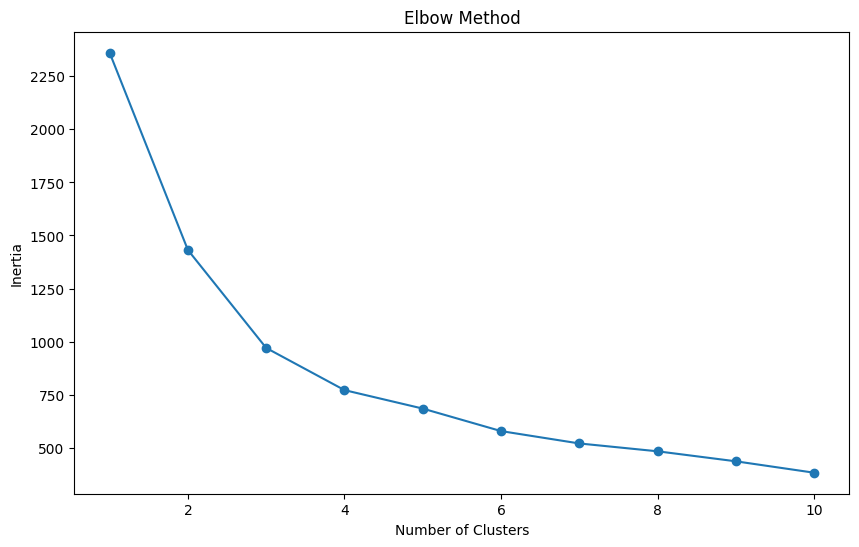

In [87]:
# 3. Tentukan Jumlah Kluster
# Menggunakan Elbow Method untuk menentukan jumlah kluster yang optimal
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Visualisasikan Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [101]:
# Dari grafik Elbow Method, pilih jumlah kluster
optimal_k = 3  # Misalnya Anda memilih 4 kluster

# 4. Terapkan K-Means Clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df_rfm['cluster'] = kmeans.fit_predict(X_scaled)

# Tampilkan hasil clustering
df_rfm

,customer_name,recency,frequency,monetary,cluster,PCA1,PCA2
0,Leon Barnes,1,9,2303.0,2,0.861689,-0.616638
1,Jose Gambino,1,26,4282.0,0,4.340698,0.747358
2,Rebecca Chamberlain,1,9,836.0,2,0.267223,-1.033495
3,Eloise Sykes,1,16,3578.0,0,2.480673,0.075753
4,Evie Morton,1,9,3310.0,0,1.269751,-0.330492
...,...,...,...,...,...,...,...
782,Harold Smith,1289,4,945.0,1,-2.694310,3.151713
783,Tyler Whitehead,1310,2,1315.0,1,-2.895495,3.234116
784,Leon Thompson,1311,1,519.0,1,-3.377251,2.964180
785,Jodie Garner,1344,1,16.0,1,-3.637916,2.933726


In [105]:
# Assuming `kmeans` is your KMeans model
dump(kmeans, 'model.joblib')

# Load the model
# kmeans = load('model.joblib')

['model.joblib']

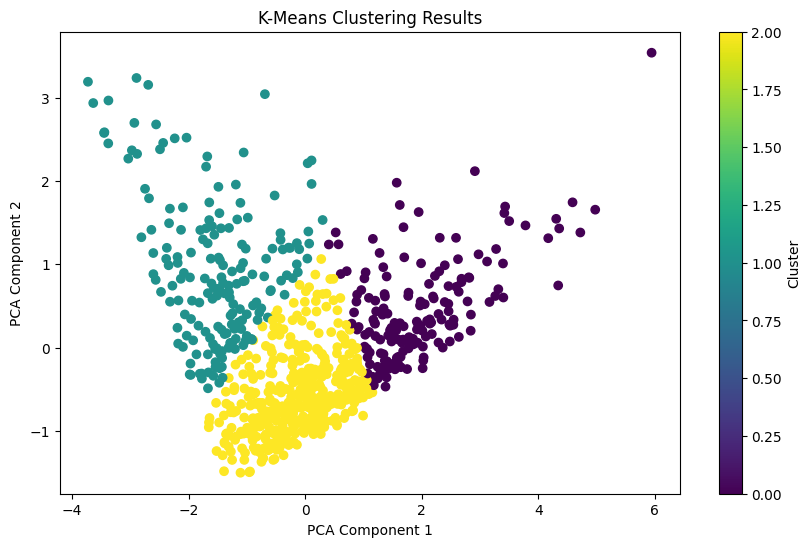

In [102]:
# Reduksi dimensi untuk visualisasi
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Tambahkan hasil PCA ke DataFrame
df_rfm['PCA1'] = X_pca[:, 0]
df_rfm['PCA2'] = X_pca[:, 1]

# Visualisasi Cluster
plt.figure(figsize=(10, 6))
plt.scatter(df_rfm['PCA1'], df_rfm['PCA2'], c=df_rfm['cluster'], cmap='viridis')
plt.title('K-Means Clustering Results')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

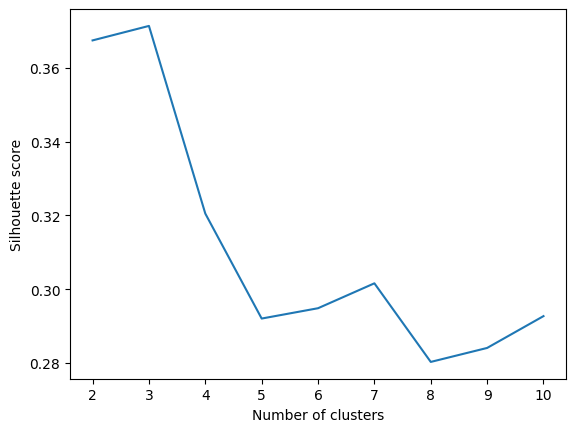

In [97]:
# Determine the optimal number of clusters
scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels_)
    scores.append(score)
plt.plot(range(2, 11), scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()

In [98]:
df_rfm

,customer_name,recency,frequency,monetary,cluster,PCA1,PCA2
0,Leon Barnes,1,9,2303.0,1,0.861689,-0.616638
1,Jose Gambino,1,26,4282.0,0,4.340698,0.747358
2,Rebecca Chamberlain,1,9,836.0,1,0.267223,-1.033495
3,Eloise Sykes,1,16,3578.0,0,2.480673,0.075753
4,Evie Morton,1,9,3310.0,1,1.269751,-0.330492
...,...,...,...,...,...,...,...
782,Harold Smith,1289,4,945.0,3,-2.694310,3.151713
783,Tyler Whitehead,1310,2,1315.0,3,-2.895495,3.234116
784,Leon Thompson,1311,1,519.0,3,-3.377251,2.964180
785,Jodie Garner,1344,1,16.0,3,-3.637916,2.933726


In [100]:
# Silhouette Analysis
for num_clusters in range(2, 11):
    
    # Initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(X_scaled)
    cluster_labels = kmeans.labels_
    
    # Silhouette Score
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.36640667706545665
For n_clusters=3, the silhouette score is 0.3713592011430187
For n_clusters=4, the silhouette score is 0.3139912984657353
For n_clusters=5, the silhouette score is 0.2917923930935521
For n_clusters=6, the silhouette score is 0.3201743065398827
For n_clusters=7, the silhouette score is 0.30834845154781226
For n_clusters=8, the silhouette score is 0.27500728130025
For n_clusters=9, the silhouette score is 0.2989732036343364
For n_clusters=10, the silhouette score is 0.3050087983329595


# PII Customer Segmentation

- Berapa langkah yang diperlukan?
- Berapa fungsi yang akan dibuat utk:
    - build_model.py
    - run_model.py
- REST API utk model -> api.py

#### Update Columns Name

In [2]:
df = pd.read_csv("datasets/data_pii_pst-customerV3.csv")
df.head(3)

,customer.cust_id,customer.name,customer.email,customer.phone_numb,customer.account_number,customer.bank_id,customer.ktp,customer.dob,customer.city,customer.address,customer.postal_code,customer.total_transaction,customer.income
0,64803,Kimberly Mckinney,xxxxxxxx.xxxxxxxx@xxxxxxx.xxx,+62 xxxxxxxxxxx,301fdcc91747c3115e4f0dda4de50ab025cc913008dd28...,22,3275xxxxxxxxxxxx,19 - 22,Jakarta,Xx. Xxxxxxx Xx. nn,10150,731064773.0,7652685.0
1,57331,Kelly Silva,xxxxx.xxxxx@xxxxxxx.xxx,+62 xxxxxxxxxxx,8942a119fed40f880c327e639ac516305570f1e8a20988...,22,3275xxxxxxxxxxxx,39 - 42,Semarang,Xx. Xxxxxx Xx. nn,50115,787979424.0,9305611.0
2,20759,Heather Jackson,xxxxxxx.xxxxxxx@xxxxx.xxx,+62 xxxxxxxxxxx,ad11e86805a43736012a0424bd880259326d3b0ff2e9f2...,8,3275xxxxxxxxxxxx,51 - 54,Medan,Xx. Xxxxxxxx Xxxx Xx. nn,20111,207590810.0,3984638.0


In [3]:
def update_colnames(df):
    # Original list of column names
    df.columns

    # Remove "customer." from each column name
    updated_columns = [col.replace('customer.', '') for col in df.columns]

    # Update the DataFrame with the new column names
    df.columns = updated_columns

    # Display updated list
    print(updated_columns)

    return df

In [4]:
df = update_colnames(df)

['cust_id', 'name', 'email', 'phone_numb', 'account_number', 'bank_id', 'ktp', 'dob', 'city', 'address', 'postal_code', 'total_transaction', 'income']


In [5]:
df.head(3)

,cust_id,name,email,phone_numb,account_number,bank_id,ktp,dob,city,address,postal_code,total_transaction,income
0,64803,Kimberly Mckinney,xxxxxxxx.xxxxxxxx@xxxxxxx.xxx,+62 xxxxxxxxxxx,301fdcc91747c3115e4f0dda4de50ab025cc913008dd28...,22,3275xxxxxxxxxxxx,19 - 22,Jakarta,Xx. Xxxxxxx Xx. nn,10150,731064773.0,7652685.0
1,57331,Kelly Silva,xxxxx.xxxxx@xxxxxxx.xxx,+62 xxxxxxxxxxx,8942a119fed40f880c327e639ac516305570f1e8a20988...,22,3275xxxxxxxxxxxx,39 - 42,Semarang,Xx. Xxxxxx Xx. nn,50115,787979424.0,9305611.0
2,20759,Heather Jackson,xxxxxxx.xxxxxxx@xxxxx.xxx,+62 xxxxxxxxxxx,ad11e86805a43736012a0424bd880259326d3b0ff2e9f2...,8,3275xxxxxxxxxxxx,51 - 54,Medan,Xx. Xxxxxxxx Xxxx Xx. nn,20111,207590810.0,3984638.0


In [10]:
df[['bank_id', 'dob', 'city', 'total_transaction', 'income']].head()

,bank_id,dob,city,total_transaction,income
0,22,19 - 22,Jakarta,731064773.0,7652685.0
1,22,39 - 42,Semarang,787979424.0,9305611.0
2,8,51 - 54,Medan,207590810.0,3984638.0
3,2,35 - 38,Bandung,870578029.0,2603126.0
4,2,51 - 54,Medan,686373810.0,8529827.0


In [53]:
# Kalau data diread dalam bentuk csv, \
# maka tipe datanya akan banyak berbentuk objek
df.info()
# oleh karena itu perlu dilakukan preprocessing data/konversi tipe data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   cust_id            10000 non-null  int64  
 1   name               10000 non-null  object 
 2   email              10000 non-null  object 
 3   phone_numb         10000 non-null  object 
 4   account_number     10000 non-null  object 
 5   bank_id            10000 non-null  int64  
 6   ktp                10000 non-null  object 
 7   dob                10000 non-null  object 
 8   city               10000 non-null  object 
 9   address            10000 non-null  object 
 10  postal_code        10000 non-null  int64  
 11  total_transaction  10000 non-null  float64
 12  income             10000 non-null  float64
dtypes: float64(2), int64(3), object(8)
memory usage: 1015.8+ KB


#### Preprocessing Data

In [11]:
def preprocess_data(df: pd.DataFrame) -> pd.DataFrame:
    """
    Preprocess the DataFrame by drop unused columns, converting column data types, and encoding columns.
    Parameters:
    - df (pd.DataFrame): Input DataFrame containing various data types.
    Returns:
    - pd.DataFrame: The processed DataFrame with specified columns converted to appropriate data types.
    """

    # Drop unused columns for analysis
    df = df.drop(columns=['email', \
                        'phone_numb', \
                        'account_number', \
                        'ktp', \
                        'address', \
                        'postal_code'])

    # Convert specified columns to string type
    string_columns = ['cust_id', 'name', 'bank_id', 'dob', 'city']
    df[string_columns] = df[string_columns].astype('string')
    # Convert specified columns to float64 (decimal)
    decimal_columns = ['total_transaction', 'income']
    df[decimal_columns] = df[decimal_columns].astype('float64')
    
    return df

In [55]:
# Example usage:
df_processed = preprocess_data(df)
print(df_processed.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   cust_id            10000 non-null  string 
 1   name               10000 non-null  string 
 2   bank_id            10000 non-null  string 
 3   dob                10000 non-null  string 
 4   city               10000 non-null  string 
 5   total_transaction  10000 non-null  float64
 6   income             10000 non-null  float64
dtypes: float64(2), string(5)
memory usage: 547.0 KB
None


In [56]:
df_processed.head(3)

,cust_id,name,bank_id,dob,city,total_transaction,income
0,64803,Kimberly Mckinney,22,19 - 22,Jakarta,731064773.0,7652685.0
1,57331,Kelly Silva,22,39 - 42,Semarang,787979424.0,9305611.0
2,20759,Heather Jackson,8,51 - 54,Medan,207590810.0,3984638.0


In [24]:
df_processed.describe().T

,count,mean,std,min,25%,50%,75%,max
total_transaction,10000.0,5.013792e+08,2.884588e+08,1252258.0,2.556634e+08,496416444.0,7.578338e+08,999958906.0
income,10000.0,5.979031e+06,2.313748e+06,2000430.0,3.984130e+06,5955286.5,7.998925e+06,9999899.0


In [29]:
profile = ProfileReport(df_processed, title="Pandas Profiling Report")

In [30]:
profile.to_file("your_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 17.55it/s]


In [31]:
# As a JSON string
json_data = profile.to_json()

# As a file
profile.to_file("your_report.json")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 13.76it/s]


#### Encode Data

In [ ]:
# - for dob (age interval) make it hot encode 9 cluster
# 19-22 ---> 1
# 23-26 ---> 2
# 27-30 ---> 3
# 31-34 ---> 4
# 35-38 ---> 5
# 39-42 ---> 6
# 43-46 ---> 7
# 47-50 ---> 8
# 51-54 ---> 9

# - for 'bank_id', encode into:
# '002' (BRI)---> 1
# '008' (Bank Mandiri) ---> 2
# '009' (BNI) ---> 3
# '011' (Bank Danamon)---> 4
# '013' (Bank Permata) ---> 5
# '014' (BCA) ---> 6
# '022' (Bank CIMB Niaga) ---> 7

# - for 'city' encode into
# Bandung ---> 1
# Jakarta ---> 2
# Medan ---> 3
# Semarang ---> 4
# Surabaya ---> 5

In [12]:
def encode_data(df: pd.DataFrame) -> pd.DataFrame:
    # Encoding 'dob' (age interval) into 9 clusters
    age_mapping = {
        '19 - 22': 1, '23 - 26': 2, '27 - 30': 3, '31 - 34': 4, '35 - 38': 5,
        '39 - 42': 6, '43 - 46': 7, '47 - 50': 8, '51 - 54': 9
    }
    df['dob'] = df['dob'].map(age_mapping)
    # Encoding 'bank_id'
    bank_mapping = {'2': 1, '8': 2, '9': 3, '11': 4, '13': 5, '14': 6, '22': 7}
    df['bank_id'] = df['bank_id'].map(bank_mapping)
    # Encoding 'city'
    city_mapping = {'Bandung': 1, 'Jakarta': 2, 'Medan': 3, 'Semarang': 4, 'Surabaya': 5}
    df['city'] = df['city'].map(city_mapping)

    return df

In [58]:
df_encoded = encode_data(df_processed)
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   cust_id            10000 non-null  string 
 1   name               10000 non-null  string 
 2   bank_id            10000 non-null  int64  
 3   dob                10000 non-null  int64  
 4   city               10000 non-null  int64  
 5   total_transaction  10000 non-null  float64
 6   income             10000 non-null  float64
dtypes: float64(2), int64(3), string(2)
memory usage: 547.0 KB


In [60]:
df_processed.head(3)

,cust_id,name,bank_id,dob,city,total_transaction,income
0,64803,Kimberly Mckinney,7,1,2,731064773.0,7652685.0
1,57331,Kelly Silva,7,6,4,787979424.0,9305611.0
2,20759,Heather Jackson,2,9,3,207590810.0,3984638.0


#### Exploratory Data Analysis

In [159]:
# df_processed \
#     .groupby('postal_code')['cust_id'] \
#     .count() \
#     .reset_index() \
#     .sort_values(by='postal_code', ascending=True)

In [160]:
# Kok bisa "postal_code" == 48351 itu beda2 kotanya?
# bisa jakarta, surabaya, medan?
# df_processed[df_processed['postal_code']=='10110']
# df_processed[df_processed['ktp']=='3275087275741027']

In [98]:
df_processed \
    .groupby('bank_id')['cust_id'] \
    .count() \
    .reset_index() \
    .sort_values(by='bank_id', ascending=True)

,bank_id,cust_id
0,11,1436
1,13,1378
2,14,1424
3,2,1454
4,22,1428
5,8,1441
6,9,1439


In [99]:
df_processed[['bank_id']].nunique()
# df_processed

bank_id    7
dtype: int64

In [117]:
# df_processed['name'].nunique()
# df_processed[df_processed['name']!=nunique()]
df[df['bank_id'].duplicated(keep=False)]

,cust_id,name,email,phone_numb,account_number,bank_id,ktp,dob,city,address,postal_code,total_transaction,income
0,64803,Kimberly Mckinney,xxxxxxxx.xxxxxxxx@xxxxxxx.xxx,+62 xxxxxxxxxxx,301fdcc91747c3115e4f0dda4de50ab025cc913008dd28...,22,3275xxxxxxxxxxxx,19 - 22,Jakarta,Xx. Xxxxxxx Xx. nn,10150,731064773.0,7652685.0
1,57331,Kelly Silva,xxxxx.xxxxx@xxxxxxx.xxx,+62 xxxxxxxxxxx,8942a119fed40f880c327e639ac516305570f1e8a20988...,22,3275xxxxxxxxxxxx,39 - 42,Semarang,Xx. Xxxxxx Xx. nn,50115,787979424.0,9305611.0
2,20759,Heather Jackson,xxxxxxx.xxxxxxx@xxxxx.xxx,+62 xxxxxxxxxxx,ad11e86805a43736012a0424bd880259326d3b0ff2e9f2...,8,3275xxxxxxxxxxxx,51 - 54,Medan,Xx. Xxxxxxxx Xxxx Xx. nn,20111,207590810.0,3984638.0
3,85460,Dalton Salinas,xxxxxx.xxxxxxx@xxxxxxx.xxx,+62 xxxxxxxxxxx,eb539b105b8d1a99f06f7a68e556a61c9c104de7aa2aef...,2,3275xxxxxxxxxxxx,35 - 38,Bandung,Xx. Xxxx Xxxxxx Xx. nn,40112,870578029.0,2603126.0
4,12955,William Estrada,xxxxxxx.xxxxxxx@xxxxx.xxx,+62 xxxxxxxxxxx,cf635df1a620915631523f5d8747283267e34277f4135b...,2,3275xxxxxxxxxxxx,51 - 54,Medan,Xx. Xxxxxxxx Xxxx Xx. nnn,20114,686373810.0,8529827.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,29696,Monica Brown,xxxxxx.xxxxx@xxxxxxx.xxx,+62 xxxxxxxxxxx,b18b44e9bf875dad2f5ac065f30d0150d6f301d92f90bb...,13,3275xxxxxxxxxxxx,35 - 38,Semarang,Xx. Xxxxxxx Xxxx Xx. nn,50115,678579510.0,6921003.0
9996,27592,Crystal Miller,xxxxxxx.xxxxxx@xxxxx.xxx,+62 xxxxxxxxxxx,797d4ec60f7a6497cfeed999bbceb5cf71102f3ea51756...,8,3275xxxxxxxxxxxx,27 - 30,Jakarta,Xx. Xxxxxxxx Xx. nn,10140,733986705.0,2124036.0
9997,61465,Wesley Walker,xxxxxx.xxxxxx@xxxxx.xxx,+62 xxxxxxxxxxx,e8d7ddab1d8ffedebfa2fc84518e776bde5267d497d103...,8,3275xxxxxxxxxxxx,35 - 38,Surabaya,Xx. Xxxxx Xx. nn,60114,732283725.0,4747212.0
9998,98921,Suzanne Obrien,xxxxxxx.xxxxxx@xxxxxxx.xxx,+62 xxxxxxxxxxx,c189ae05afe24bae74270c1b821b9d1fb02c1a5cf90dc1...,11,3275xxxxxxxxxxxx,27 - 30,Bandung,Xx. Xxxx Xxxxxx Xx. n,40115,77003224.0,4441785.0


In [101]:
# Assuming you have a DataFrame 'df' with a 'name' column

# Step 1: Find duplicated names and count occurrences
duplicated_names = df['name'][df['name'].duplicated(keep=False)]

# Step 2: Group by 'name' and count the occurrences
name_counts = duplicated_names.value_counts()

# Display the duplicated names and their counts
print(name_counts)

Series([], Name: count, dtype: Int64)


In [102]:
df_processed[df_processed['name']=='Daniel Smith']

,cust_id,name,email,phone_numb,account_number,bank_id,ktp,dob,city,address,postal_code,total_transaction,income
1506,67716,Daniel Smith,xxxxxx.xxxxx@xxxxxxx.xxx,+62 xxxxxxxxxxx,8f691ca4fd5833686c6e8fc9d06242aad4ceebdd1ef9f2...,8,3275xxxxxxxxxxxx,43 - 46,Bandung,Xx. Xxxx Xx. nn,40113,386507395.0,6410854.0


In [103]:
df_processed.groupby('cust_id')['city'].count().reset_index()

,cust_id,city
0,10000,1
1,10015,1
2,10016,1
3,10017,1
4,10038,1
...,...,...
9995,99968,1
9996,99971,1
9997,99974,1
9998,99978,1


In [38]:
# Step 1: Find duplicated cust_id and count occurrences
duplicated_cust_id = df_processed['cust_id'][df_processed['cust_id'].duplicated(keep=False)]

# Step 2: Group by 'cust_id' and count the occurrences
cust_id_counts = duplicated_cust_id.value_counts()

# Display the duplicated cust_id and their counts
print(cust_id_counts)

Series([], Name: count, dtype: Int64)


In [39]:
df_processed[df_processed['cust_id']=='99971']

,cust_id,name,email,phone_numb,account_number,bank_id,ktp,dob,city,address,postal_code,total_transaction,income
9524,99971,Steven Underwood,xxxxxx.xxxxxxxxx@xxxxx.xxx,+62 xxxxxxxxxxx,db44c4ecb18e143a8de31d63cc5ecbc07a0c94e58c108b...,913,3275xxxxxxxxxxxx,19 - 29,Semarang,Xx. Xxxxxxxxxx Xx. nn,82252,161736476.0,7117392.0


In [24]:
print(df_processed \
    .groupby('dob')['cust_id'] \
    .count() \
    .reset_index()
    )

print(df_processed \
    .groupby('bank_id')['cust_id'] \
    .count() \
    .reset_index() \
    .sort_values(by='bank_id', ascending=True)
    )

print(df_processed \
    .groupby('city')['cust_id'] \
    .count() \
    .reset_index() \
    .sort_values(by='city', ascending=True)
    )

# print(df_processed \
#     .groupby('postal_code')['cust_id'] \
#     .count() \
#     .reset_index()
#     )

# print(df_processed.groupby('postal_code')['cust_id'].count().reset_index())

   dob  cust_id
0    1     1081
1    2     1036
2    3     1156
3    4     1160
4    5     1094
5    6     1167
6    7     1121
7    8     1069
8    9     1116
   bank_id  cust_id
0        1     1454
1        2     1441
2        3     1439
3        4     1436
4        5     1378
5        6     1424
6        7     1428
   city  cust_id
0     1     1981
1     2     1986
2     3     1967
3     4     2014
4     5     2052


##### Calculate Frequency

In [113]:
def calculate_frequency(df: pd.DataFrame) -> pd.DataFrame:
    """
    Calculate Frequency (F) - Number of transactions per customer.
    Parameters:
    - df (pd.DataFrame): Input DataFrame containing order information. 
                         It should have columns 'name' and 'cust_id'.
    Returns:
    - pd.DataFrame: A DataFrame containing customer names and their corresponding order frequency.
                     The DataFrame has two columns: 'customer_name' and 'frequency'.
                     'frequency' represents the number of transactions made by each customer.
    """
    # Calculate frequency: Number of transactions per customer
    df_f = df.groupby(['name'])['cust_id'] \
        .count() \
        .reset_index() \
        .sort_values(by='cust_id', ascending=False)
    # Rename the column "cust_id" to "frequency"
    df_f.columns = ['customer_name', 'frequency']
    return df_f

In [114]:
# Example usage:
df_f = calculate_frequency(df_processed)
# df_f.head(5)
df_f

,customer_name,frequency
9983,Zachary Melton,1
9982,Zachary Mack,1
9981,Zachary Lee,1
9980,Zachary King,1
9979,Zachary Jones,1
...,...,...
4,Aaron Dixon,1
3,Aaron Cox,1
2,Aaron Carter,1
1,Aaron Bennett,1


##### Calculate Monetary

In [115]:
def calculate_monetary(df: pd.DataFrame) -> pd.DataFrame:
    """
    Calculate Monetary (M) - Total transaction per customer.
    Parameters:
    - df (pd.DataFrame): Input DataFrame containing transaction information. 
                         It should have columns 'customer_name' and 'total_transaction'.
    Returns:
    - pd.DataFrame: A DataFrame containing customer names and their corresponding total transaction.
                     The DataFrame has two columns: 'customer_name' and 'monetary'.
                     'monetary' represents the total transaction incurred by each customer.
    """
    # Calculate monetary: Total transaction per customer
    df_m = df.groupby('name')['total_transaction'] \
              .sum() \
              .reset_index() \
              .sort_values(by='total_transaction', ascending=False)
    # Rename the column "total_cost" to "monetary"
    df_m.columns = ['customer_name', 'monetary']
    return df_m

In [116]:
# Example usage:
df_m = calculate_monetary(df_processed)
# df_m.head(5)
df_m

,customer_name,monetary
5539,Kim Patel,999897651.0
3075,Emily Sweeney,999838877.0
7354,Nathaniel Powers,999835700.0
1578,Catherine Edwards,999758220.0
3049,Emily Elliott,999674182.0
...,...,...
2871,Dr. Robert Daniels PhD,1254147.0
6651,Meghan Sanchez,1239984.0
869,Ashley Holmes,1115717.0
1218,Brent West,1076286.0


#### K-Means Clustering with 5 features

In [61]:
df_encoded.head(3)

,cust_id,name,bank_id,dob,city,total_transaction,income
0,64803,Kimberly Mckinney,7,1,2,731064773.0,7652685.0
1,57331,Kelly Silva,7,6,4,787979424.0,9305611.0
2,20759,Heather Jackson,2,9,3,207590810.0,3984638.0


In [62]:
# 3. Feature Scaling
# Select features for clustering
X = df_encoded[['dob', 'bank_id', 'city', 'total_transaction', 'income']]

# Normalize the data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# # Apply KMeans clustering
# kmeans = KMeans(n_clusters=3, random_state=42)
# df_processed['cluster'] = kmeans.fit_predict(X_scaled)

# # Display the DataFrame with the cluster assignments
# print(df_processed[['cust_id', 'name', 'cluster']])

In [63]:
# Save the scaler
dump(scaler, 'Scripts\model\scaler.save')

['Scripts\\model\\scaler.save']

In [64]:
X_scaled

array([[0.        , 1.        , 0.25      , 0.73075764, 0.70657877],
       [0.625     , 1.        , 0.75      , 0.787746  , 0.91320824],
       [1.        , 0.16666667, 0.5       , 0.20660577, 0.24804246],
       ...,
       [0.5       , 0.16666667, 1.        , 0.73197817, 0.34337054],
       [0.25      , 0.5       , 0.        , 0.07584907, 0.30518963],
       [0.        , 0.5       , 0.5       , 0.95141874, 0.94111472]])

In [44]:
# 4. K-Means Clustering
# Find the optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 13):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

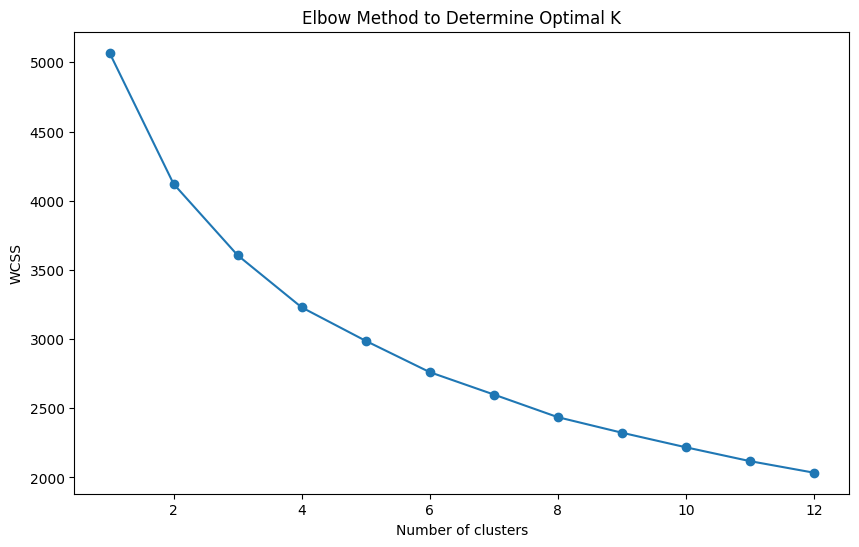

In [45]:
# Plot the Elbow curve
plt.figure(figsize=(10,6))
plt.plot(range(1, 13), wcss, marker='o')
plt.title('Elbow Method to Determine Optimal K')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [49]:
# Silhouette Analysis
for num_clusters in range(2, 13):
    
    # Initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(X_scaled)
    cluster_labels = kmeans.labels_
    
    # Silhouette Score
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.16096894942794257
For n_clusters=3, the silhouette score is 0.16145350410912046
For n_clusters=4, the silhouette score is 0.153566372680062
For n_clusters=5, the silhouette score is 0.15540856083256613
For n_clusters=6, the silhouette score is 0.15733684401072032
For n_clusters=7, the silhouette score is 0.15812169106075039
For n_clusters=8, the silhouette score is 0.1636285008474952
For n_clusters=9, the silhouette score is 0.16611603395548877
For n_clusters=10, the silhouette score is 0.16591386621522566
For n_clusters=11, the silhouette score is 0.16765864872289593
For n_clusters=12, the silhouette score is 0.16461927780949365


In [22]:
from sklearn.metrics import silhouette_samples, silhouette_score

clusters_range=range(2, 20)
random_range  =range(0, 20)
results=[]

for c in clusters_range:
    for r in random_range:
        clusterer=KMeans(n_clusters=c, random_state=r)
        cluster_labels=clusterer.fit_predict(X_scaled)
        silhouette_avg=silhouette_score(X_scaled, cluster_labels)
        results.append([c,r,silhouette_avg])

result  =pd.DataFrame(results, columns=["n_clusters","seed","silhouette_score"])
pivot_km=pd.pivot_table(result, index="n_clusters", columns="seed",values="silhouette_score")

plt.figure(figsize=(15, 6))
sns.heatmap(pivot_km, annot=True, linewidths=.5, fmt='.3f', cmap=sns.cm.rocket_r)
plt.tight_layout()

In [65]:
from joblib import dump

# Based on the Elbow method, choose the optimal K
optimal_k = 4  # For example, if 4 looks like the elbow point

# Apply K-Means with the optimal K
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Save the KMeans model
# dump(kmeans, 'Scripts\model\pii-customer_kmeans_model.joblib')
dump(kmeans, 'Scripts\model\pii-customer_kmeans_model.pkl')

['Scripts\\model\\pii-customer_kmeans_model.pkl']

In [ ]:
# df_encoded = df_encoded.drop('cluster', axis=1)
# df_processed = df_processed.drop('cluster', axis=1)

In [59]:
# 5. Attach the cluster labels to the original dataframe
df['cluster'] = clusters

In [60]:
df.head(3)

,cust_id,name,email,phone_numb,account_number,bank_id,ktp,dob,city,address,postal_code,total_transaction,income,cluster
0,64803,Kimberly Mckinney,xxxxxxxx.xxxxxxxx@xxxxxxx.xxx,+62 xxxxxxxxxxx,301fdcc91747c3115e4f0dda4de50ab025cc913008dd28...,22,3275xxxxxxxxxxxx,19 - 22,Jakarta,Xx. Xxxxxxx Xx. nn,10150,731064773.0,7652685.0,3
1,57331,Kelly Silva,xxxxx.xxxxx@xxxxxxx.xxx,+62 xxxxxxxxxxx,8942a119fed40f880c327e639ac516305570f1e8a20988...,22,3275xxxxxxxxxxxx,39 - 42,Semarang,Xx. Xxxxxx Xx. nn,50115,787979424.0,9305611.0,2
2,20759,Heather Jackson,xxxxxxx.xxxxxxx@xxxxx.xxx,+62 xxxxxxxxxxx,ad11e86805a43736012a0424bd880259326d3b0ff2e9f2...,8,3275xxxxxxxxxxxx,51 - 54,Medan,Xx. Xxxxxxxx Xxxx Xx. nn,20111,207590810.0,3984638.0,0


In [ ]:
df.to_csv('datasets\df_result.csv', index=False)

In [ ]:
# # 6. Cluster Visualization using PCA
# pca = PCA(n_components=2)
# pca_features = pca.fit_transform(scaled_features)

# plt.figure(figsize=(10,6))
# sns.scatterplot(x=pca_features[:, 0], y=pca_features[:, 1], hue=df_cleaned['cluster'], palette='Set2', s=100)
# plt.title('Customer Segmentation using K-Means')
# plt.show()

#### Decode the Data

In [67]:
def decode_data(df: pd.DataFrame) -> pd.DataFrame:
    # Reverse the mapping for 'dob' (age interval)
    reverse_age_mapping = {
        1: '19 - 22', 2: '23 - 26', 3: '27 - 30', 4: '31 - 34', 5: '35 - 38',
        6: '39 - 42', 7: '43 - 46', 8: '47 - 50', 9: '51 - 54'
    }
    df['dob'] = df['dob'].map(reverse_age_mapping)
    
    # Reverse the mapping for 'bank_id'
    reverse_bank_mapping = {1: '002', 2: '008', 3: '009', 4: '011', 5: '013', 6: '014', 7: '022'}
    df['bank_id'] = df['bank_id'].map(reverse_bank_mapping)
    
    # Reverse the mapping for 'city'
    reverse_city_mapping = {1: 'Bandung', 2: 'Jakarta', 3: 'Medan', 4: 'Semarang', 5: 'Surabaya'}
    df['city'] = df['city'].map(reverse_city_mapping)

    return df

In [73]:
df_decoded = decode_data(df_encoded)

In [74]:
df_decoded.head(3)

,cust_id,name,bank_id,dob,city,total_transaction,income
0,64803,Kimberly Mckinney,NaN,NaN,NaN,731064773.0,7652685.0
1,57331,Kelly Silva,NaN,NaN,NaN,787979424.0,9305611.0
2,20759,Heather Jackson,NaN,NaN,NaN,207590810.0,3984638.0


#### Analysis & Conversion of DoB (Date of Birth)

In [10]:
df_dob = pd.read_csv("datasets/data_pii_pst-customerV2.csv")
df_dob = update_colnames(df_dob)
# df_dob[['customer.dob']]
df_dob.head(3)

['cust_id', 'name', 'email', 'phone_numb', 'account_number', 'bank_id', 'ktp', 'dob', 'city', 'address', 'postal_code', 'total_transaction', 'income']


,cust_id,name,email,phone_numb,account_number,bank_id,ktp,dob,city,address,postal_code,total_transaction,income
0,45942,Terry Lambert,xxxxx.xxxxxxx@xxxxxxx.xxx,+62 xxxxxxxxxxx,c61d56448c2a878063b45b56a46f661544b9d7ff164e72...,944,3275xxxxxxxxxxxx,17 - 27,Medan,Xx. Xxxxxxxxxx Xx. nn,80058,306103112.0,6559336.0
1,31475,John Nelson,xxxx.xxxxxx@xxxxx.xxx,+62 xxxxxxxxxxx,0d66b293423c97d0463e911362f8ccd0273dae330d20df...,366,3275xxxxxxxxxxxx,38 - 48,Surabaya,Xx. Xxxxxxxxxx Xx. nn,60389,519192916.0,9273354.0
2,27679,Isaiah Clark,xxxxxx.xxxxx@xxxxxxx.xxx,+62 xxxxxxxxxxx,caa64afa3908d869d9edbddcc7be874b1adafdcc5529e9...,971,3275xxxxxxxxxxxx,46 - 56,Bandung,Xx. Xxxxxxxxxx Xx. nn,89473,379914079.0,7904740.0


In [67]:
# Function to calculate the actual age from the given range
def calculate_actual_age(age_range):
    # Split the string into two parts (age 5 years ago and age 5 years in the future)
    age_5_years_ago, age_5_years_future = map(int, age_range.split(' - '))
    
    # Calculate the midpoint which gives the actual current age
    actual_age = (age_5_years_ago + age_5_years_future) // 2
    return actual_age

# Apply the function to the 'age_range' column
df_dob['actual_age'] = df_dob['dob'].apply(calculate_actual_age)

# Display the DataFrame with the new 'actual_age' column
# print(df_dob)
df_dob.head(3)

,cust_id,name,email,phone_numb,account_number,bank_id,ktp,dob,city,address,postal_code,total_transaction,income,actual_age
0,45942,Terry Lambert,xxxxx.xxxxxxx@xxxxxxx.xxx,+62 xxxxxxxxxxx,c61d56448c2a878063b45b56a46f661544b9d7ff164e72...,944,3275xxxxxxxxxxxx,17 - 27,Medan,Xx. Xxxxxxxxxx Xx. nn,80058,306103112.0,6559336.0,22
1,31475,John Nelson,xxxx.xxxxxx@xxxxx.xxx,+62 xxxxxxxxxxx,0d66b293423c97d0463e911362f8ccd0273dae330d20df...,366,3275xxxxxxxxxxxx,38 - 48,Surabaya,Xx. Xxxxxxxxxx Xx. nn,60389,519192916.0,9273354.0,43
2,27679,Isaiah Clark,xxxxxx.xxxxx@xxxxxxx.xxx,+62 xxxxxxxxxxx,caa64afa3908d869d9edbddcc7be874b1adafdcc5529e9...,971,3275xxxxxxxxxxxx,46 - 56,Bandung,Xx. Xxxxxxxxxx Xx. nn,89473,379914079.0,7904740.0,51


In [68]:
df_dob[['actual_age']]

,actual_age
0,22
1,43
2,51
3,42
4,52
...,...
9995,46
9996,23
9997,46
9998,27


In [70]:
import pandas as pd
import numpy as np
import math

# Assuming 'df_dob' is your DataFrame with the 'actual_age' column

# Number of data points
n = len(df_dob['actual_age'])

# Sturges' Formula to calculate the number of classes
sturges_classes = math.ceil(1 + 3.322 * math.log10(n))

# Square Root Choice
sqrt_classes = math.ceil(math.sqrt(n))

# Range of the data (Max - Min)
data_range = df_dob['actual_age'].max() - df_dob['actual_age'].min()

# Calculate class width using Sturges' number of classes
sturges_class_width = data_range / sturges_classes

# Calculate class width using Square Root number of classes
sqrt_class_width = data_range / sqrt_classes

# Display results
print(f"Number of Classes (Sturges): {sturges_classes}")
print(f"Class Width (Sturges): {sturges_class_width:.2f}")

print(f"Number of Classes (Square Root): {sqrt_classes}")
print(f"Class Width (Square Root): {sqrt_class_width:.2f}")

Number of Classes (Sturges): 15
Class Width (Sturges): 2.33
Number of Classes (Square Root): 100
Class Width (Square Root): 0.35


In [73]:
import pandas as pd
import numpy as np
import math

# Assuming 'df_dob' is your DataFrame with the 'actual_age' column

# Number of data points
n = len(df_dob['actual_age'])

# Sturges' Formula to calculate the number of classes
sturges_classes = math.ceil(1 + 3.322 * math.log10(n))

# Range of the data (Max - Min)
data_min = df_dob['actual_age'].min()
data_max = df_dob['actual_age'].max()
data_range = data_max - data_min

# Calculate class width using Sturges' number of classes
sturges_class_width = math.ceil(data_range / sturges_classes)

# Create the interval ranges
intervals = pd.interval_range(start=data_min, end=data_max, freq=sturges_class_width, closed='left')

# Create a categorical column to assign each age to an interval bin
df_dob['age_interval'] = pd.cut(df_dob['actual_age'], bins=intervals)

# Create a frequency table (count of data points in each interval)
interval_table = df_dob['age_interval'].value_counts().sort_index()

# Display the interval table
print(interval_table)

# Optional: Convert to DataFrame for a clearer table output
interval_df = interval_table.reset_index()
interval_df.columns = ['Age Interval', 'Frequency']

# Display the table with intervals and frequency counts
print(interval_df)


age_interval
[19, 22)    763
[22, 25)    811
[25, 28)    833
[28, 31)    854
[31, 34)    836
[34, 37)    843
[37, 40)    837
[40, 43)    852
[43, 46)    846
[46, 49)    822
[49, 52)    861
Name: count, dtype: int64
   Age Interval  Frequency
0      [19, 22)        763
1      [22, 25)        811
2      [25, 28)        833
3      [28, 31)        854
4      [31, 34)        836
5      [34, 37)        843
6      [37, 40)        837
7      [40, 43)        852
8      [43, 46)        846
9      [46, 49)        822
10     [49, 52)        861


In [75]:
import pandas as pd
import numpy as np
import math

# Assuming 'df_dob' is your DataFrame with the 'actual_age' column

# Number of data points
n = len(df_dob['actual_age'])

# Sturges' Formula to calculate the number of classes
sturges_classes = math.ceil(1 + 3.322 * math.log10(n))

# Range of the data (Max - Min)
data_min = df_dob['actual_age'].min()
data_max = df_dob['actual_age'].max()
data_range = data_max - data_min

# Calculate class width using Sturges' number of classes
sturges_class_width = math.ceil(data_range / sturges_classes)

# Create the interval ranges (Left-closed, Right-open to avoid overlap)
intervals = pd.interval_range(start=data_min, end=data_max, freq=sturges_class_width, closed='left')

# Create a categorical column to assign each age to an interval bin
df_dob['age_interval'] = pd.cut(df_dob['actual_age'], bins=intervals, include_lowest=True)

# Create a frequency table (count of data points in each interval)
interval_table = df_dob['age_interval'].value_counts().sort_index()

# Optional: Convert to DataFrame for a clearer table output
interval_df = interval_table.reset_index()
interval_df.columns = ['Age Interval', 'Frequency']

# Display the interval table
print(interval_df)

   Age Interval  Frequency
0      [19, 22)        763
1      [22, 25)        811
2      [25, 28)        833
3      [28, 31)        854
4      [31, 34)        836
5      [34, 37)        843
6      [37, 40)        837
7      [40, 43)        852
8      [43, 46)        846
9      [46, 49)        822
10     [49, 52)        861


In [84]:
import pandas as pd
import math

# Assuming 'df_dob' is your DataFrame with the 'actual_age' column

# Minimum and Maximum age
data_min = df_dob['actual_age'].min()
data_max = df_dob['actual_age'].max()

# Manually create custom intervals: [19-22], [23-26], [27-30], etc.
interval_edges = list(range(19, int(data_max) + 4, 4))  # Step of 4

# Adjust the last edge to make sure the maximum age is included
if data_max > interval_edges[-1]:
    interval_edges.append(data_max + 1)

# Create interval bins with left-closed, right-open intervals
intervals = pd.IntervalIndex.from_breaks(interval_edges, closed='left')

# Assign each age to its interval
df_dob['age_interval'] = pd.cut(df_dob['actual_age'], bins=intervals, include_lowest=True)

# Create a frequency table (count of data points in each interval)
interval_table = df_dob['age_interval'].value_counts().sort_index()

# Convert to DataFrame for display
interval_df = interval_table.reset_index()
interval_df.columns = ['Age Interval', 'Frequency']

# Display the interval table
print(interval_df)

  Age Interval  Frequency
0     [19, 23)       1040
1     [23, 27)       1080
2     [27, 31)       1141
3     [31, 35)       1112
4     [35, 39)       1130
5     [39, 43)       1126
6     [43, 47)       1130
7     [47, 51)       1090
8     [51, 55)       1151


In [81]:
df_dob['actual_age'].max()
# df_dob['actual_age'].min()

np.int64(54)

In [83]:
df_dob[['actual_age']].sort_values(by='actual_age', ascending=True)

,actual_age
2313,19
4579,19
3021,19
5610,19
1852,19
...,...
4761,54
4760,54
24,54
9990,54


# Codingan 1 file utk Build, Run, & Apps
Customer Segmentation final

In [9]:
# df = pd.read_csv('datasets/df_result.csv')
df = pd.read_csv('datasets/data_pii_pst-customerV3.csv')
# len(df.columns)
df.head()

,customer.cust_id,customer.name,customer.email,customer.phone_numb,customer.account_number,customer.bank_id,customer.ktp,customer.dob,customer.city,customer.address,customer.postal_code,customer.total_transaction,customer.income
0,64803,Kimberly Mckinney,xxxxxxxx.xxxxxxxx@xxxxxxx.xxx,+62 xxxxxxxxxxx,301fdcc91747c3115e4f0dda4de50ab025cc913008dd28...,22,3275xxxxxxxxxxxx,19 - 22,Jakarta,Xx. Xxxxxxx Xx. nn,10150,731064773.0,7652685.0
1,57331,Kelly Silva,xxxxx.xxxxx@xxxxxxx.xxx,+62 xxxxxxxxxxx,8942a119fed40f880c327e639ac516305570f1e8a20988...,22,3275xxxxxxxxxxxx,39 - 42,Semarang,Xx. Xxxxxx Xx. nn,50115,787979424.0,9305611.0
2,20759,Heather Jackson,xxxxxxx.xxxxxxx@xxxxx.xxx,+62 xxxxxxxxxxx,ad11e86805a43736012a0424bd880259326d3b0ff2e9f2...,8,3275xxxxxxxxxxxx,51 - 54,Medan,Xx. Xxxxxxxx Xxxx Xx. nn,20111,207590810.0,3984638.0
3,85460,Dalton Salinas,xxxxxx.xxxxxxx@xxxxxxx.xxx,+62 xxxxxxxxxxx,eb539b105b8d1a99f06f7a68e556a61c9c104de7aa2aef...,2,3275xxxxxxxxxxxx,35 - 38,Bandung,Xx. Xxxx Xxxxxx Xx. nn,40112,870578029.0,2603126.0
4,12955,William Estrada,xxxxxxx.xxxxxxx@xxxxx.xxx,+62 xxxxxxxxxxx,cf635df1a620915631523f5d8747283267e34277f4135b...,2,3275xxxxxxxxxxxx,51 - 54,Medan,Xx. Xxxxxxxx Xxxx Xx. nnn,20114,686373810.0,8529827.0


In [2]:
from datetime import datetime

def calculate_age_range(dob_str):
    # Parse the DOB string into a datetime object
    dob = datetime.strptime(dob_str, "%Y-%m-%d")
    current_year = datetime.now().year
    age = current_year - dob.year
    return age
    # Define age ranges
    # age_ranges = [
    #     '19 - 22', '23 - 26', '27 - 30', '31 - 34',
    #     '35 - 38', '39 - 42', '43 - 46', '47 - 50', '51 - 54'
    # ]

    # Check for valid age range
    # if age < 19:
    #     return 'Invalid age'
    
    # Calculate index for the age range
    # index = min((age - 19) // 4, len(age_ranges) - 1)
    # return age_ranges[index]


# Example usage
dob_str = '1990-01-01'  # Replace with actual date of birth
age_range = calculate_age_range(dob_str)
print("Age Range:", age_range)  # Output: '31 - 34' based on dob

Age Range: 34


# Check & Learn PCA

In [ ]:
# n_components in PCA:

# n_components specifies the number of principal components (or dimensions) you want to reduce your dataset to. Principal Component Analysis (PCA) finds the directions (principal components) that maximize variance in the data. By setting n_components, you’re choosing how many of these principal components to keep.
# For example, if you set n_components=3, PCA will reduce your dataset to 3 principal components, creating a 3-dimensional representation that retains as much of the original variance as possible in those three dimensions.
# Does n_components=3 mean 3D and n_components=2 mean 2D?

# Yes, setting n_components=3 will create a 3-dimensional dataset, which can be visualized in 3D. If you change n_components=2, PCA will reduce the data to 2 dimensions, which you can visualize in a 2D plot.
# So, n_components=2 will result in a 2D dataset suitable for a 2D scatter plot, while n_components=3 will give you a 3D dataset for a 3D scatter plot.

In [93]:
pca = PCA(n_components=3, random_state=42)
X_pca = pca.fit_transform(X)
X_pca_df = pd.DataFrame(data=X_pca, columns=['X1', 'X2', 'X3'])

In [94]:
# X_pca
X_pca_df.head(3)

,X1,X2,X3
0,2.296855e+08,1.680878e+06,-1.292501
1,2.866001e+08,3.335594e+06,0.698739
2,-2.937884e+08,-2.003633e+06,0.167786


In [95]:
kmeans=KMeans(n_clusters=4, random_state=42).fit(X)

In [96]:
labels = kmeans.labels_
X_pca_df['Labels'] = labels

In [100]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()

In [101]:
X_pca_df['Labels'] = X_pca_df['Labels'].astype(str)

In [104]:
import plotly.express as px

fig = px.scatter_3d(X_pca_df, x='X1', y='X2', z='X3',
              color=X_pca_df['Labels'])
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [92]:
from sklearn.decomposition import PCA
import pandas as pd

# Set n_components as needed (2 for 2D, 3 for 3D)
n_components = 3  # Change to 2 if you want 2D

# Perform PCA
pca = PCA(n_components=n_components, random_state=42)
X_pca = pca.fit_transform(X)

# Create column names dynamically based on n_components
column_names = [f'X{i+1}' for i in range(n_components)]
X_pca_df = pd.DataFrame(data=X_pca, columns=column_names)

# Display the resulting DataFrame
print(X_pca_df.head())

             X1            X2        X3
0  2.296855e+08  1.680878e+06 -1.292501
1  2.866001e+08  3.335594e+06  0.698739
2 -2.937884e+08 -2.003633e+06  0.167786
3  3.691989e+08 -3.364293e+06 -1.737357
4  1.849945e+08  2.556614e+06  0.257707


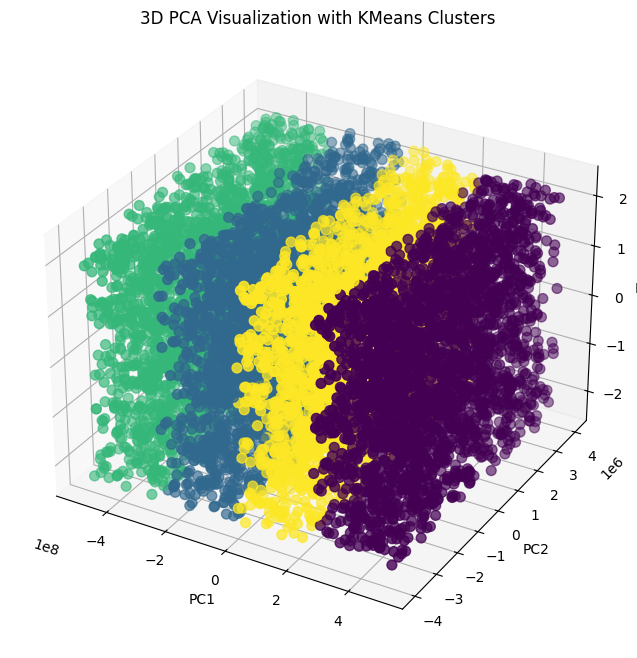

In [97]:
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

# 3D Plot of PCA-transformed data with KMeans clusters
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of the 3D PCA components with cluster labels
ax.scatter(X_pca_df['X1'], X_pca_df['X2'], X_pca_df['X3'], c=kmeans.labels_, cmap='viridis', s=50)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.title('3D PCA Visualization with KMeans Clusters')
plt.show()

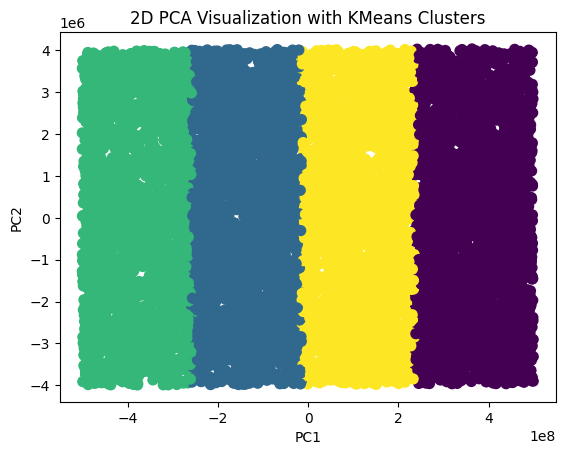

In [98]:
pca = PCA(n_components=2, random_state=42)
X_pca_2D = pca.fit_transform(X)
plt.scatter(X_pca_2D[:, 0], X_pca_2D[:, 1], c=kmeans.labels_, cmap='viridis', s=50)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('2D PCA Visualization with KMeans Clusters')
plt.show()

# Analyze the clusters

In [6]:
# df.to_csv('datasets/df_result.csv', index=False)
df = pd.read_csv('datasets/df_result.csv')

In [122]:
# df = df.reset_index(drop=True)
# df = df.drop('Unnamed: 0', axis=1)

In [7]:
# df.columns
df.head()

,cust_id,name,email,phone_numb,account_number,bank_id,ktp,dob,city,address,postal_code,total_transaction,income,cluster
0,64803,Kimberly Mckinney,xxxxxxxx.xxxxxxxx@xxxxxxx.xxx,+62 xxxxxxxxxxx,301fdcc91747c3115e4f0dda4de50ab025cc913008dd28...,22,3275xxxxxxxxxxxx,19 - 22,Jakarta,Xx. Xxxxxxx Xx. nn,10150,731064773.0,7652685.0,3
1,57331,Kelly Silva,xxxxx.xxxxx@xxxxxxx.xxx,+62 xxxxxxxxxxx,8942a119fed40f880c327e639ac516305570f1e8a20988...,22,3275xxxxxxxxxxxx,39 - 42,Semarang,Xx. Xxxxxx Xx. nn,50115,787979424.0,9305611.0,2
2,20759,Heather Jackson,xxxxxxx.xxxxxxx@xxxxx.xxx,+62 xxxxxxxxxxx,ad11e86805a43736012a0424bd880259326d3b0ff2e9f2...,8,3275xxxxxxxxxxxx,51 - 54,Medan,Xx. Xxxxxxxx Xxxx Xx. nn,20111,207590810.0,3984638.0,0
3,85460,Dalton Salinas,xxxxxx.xxxxxxx@xxxxxxx.xxx,+62 xxxxxxxxxxx,eb539b105b8d1a99f06f7a68e556a61c9c104de7aa2aef...,2,3275xxxxxxxxxxxx,35 - 38,Bandung,Xx. Xxxx Xxxxxx Xx. nn,40112,870578029.0,2603126.0,3
4,12955,William Estrada,xxxxxxx.xxxxxxx@xxxxx.xxx,+62 xxxxxxxxxxx,cf635df1a620915631523f5d8747283267e34277f4135b...,2,3275xxxxxxxxxxxx,51 - 54,Medan,Xx. Xxxxxxxx Xxxx Xx. nnn,20114,686373810.0,8529827.0,0


In [8]:
df = update_colnames(df)
df = preprocess_data(df)
df = encode_data(df)

['cust_id', 'name', 'email', 'phone_numb', 'account_number', 'bank_id', 'ktp', 'dob', 'city', 'address', 'postal_code', 'total_transaction', 'income', 'cluster']


In [9]:
df.head()

,cust_id,name,bank_id,dob,city,total_transaction,income,cluster
0,64803,Kimberly Mckinney,7,1,2,731064773.0,7652685.0,3
1,57331,Kelly Silva,7,6,4,787979424.0,9305611.0,2
2,20759,Heather Jackson,2,9,3,207590810.0,3984638.0,0
3,85460,Dalton Salinas,1,5,1,870578029.0,2603126.0,3
4,12955,William Estrada,1,9,3,686373810.0,8529827.0,0


In [4]:
df.to_csv('df_visualize.csv', index=False)

NameError: name 'df' is not defined

In [5]:
df_visualize = pd.read_csv('df_visualize.csv')
df_visualize.head()

,cust_id,name,bank_id,dob,city,total_transaction,income,cluster
0,64803,Kimberly Mckinney,7,1,2,731064773.0,7652685.0,3
1,57331,Kelly Silva,7,6,4,787979424.0,9305611.0,2
2,20759,Heather Jackson,2,9,3,207590810.0,3984638.0,0
3,85460,Dalton Salinas,1,5,1,870578029.0,2603126.0,3
4,12955,William Estrada,1,9,3,686373810.0,8529827.0,0


In [6]:
df_analysis = df_visualize[['bank_id', 'dob', 'city', 'total_transaction', 'income', 'cluster']]
df_analysis.head()

,bank_id,dob,city,total_transaction,income,cluster
0,7,1,2,731064773.0,7652685.0,3
1,7,6,4,787979424.0,9305611.0,2
2,2,9,3,207590810.0,3984638.0,0
3,1,5,1,870578029.0,2603126.0,3
4,1,9,3,686373810.0,8529827.0,0


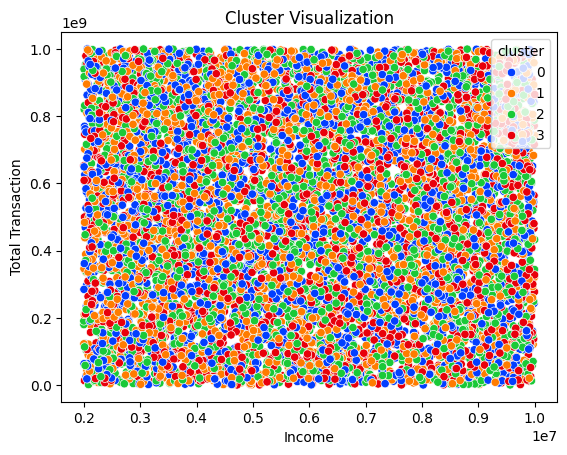

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming the data is in a pandas DataFrame named 'df_analysis'
sns.scatterplot(x='income', y='total_transaction', hue='cluster', data=df_analysis, palette='bright')

# Add labels and title
plt.xlabel('Income')
plt.ylabel('Total Transaction')
plt.title('Cluster Visualization')

# Show the plot
plt.show()

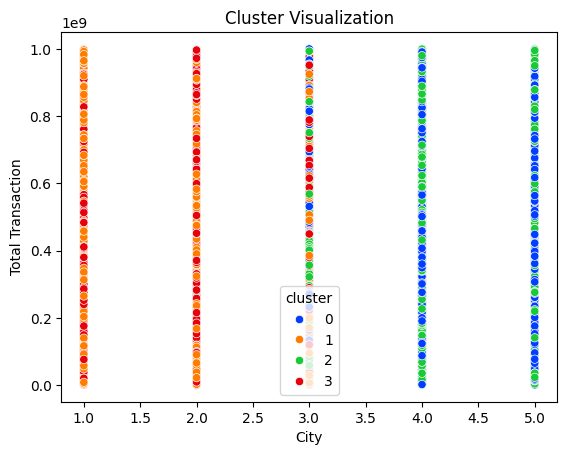

In [9]:
# Assuming the data is in a pandas DataFrame named 'df_analysis'
sns.scatterplot(x='city', y='total_transaction', hue='cluster', data=df_analysis, palette='bright')

# Add labels and title
plt.xlabel('City')
plt.ylabel('Total Transaction')
plt.title('Cluster Visualization')

# Show the plot
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_5636\2832333277.py:41: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/users/explain/axes/legend_guide.html#controlling-the-legend-entries
  plt.legend(legend_labels, legend_colors)


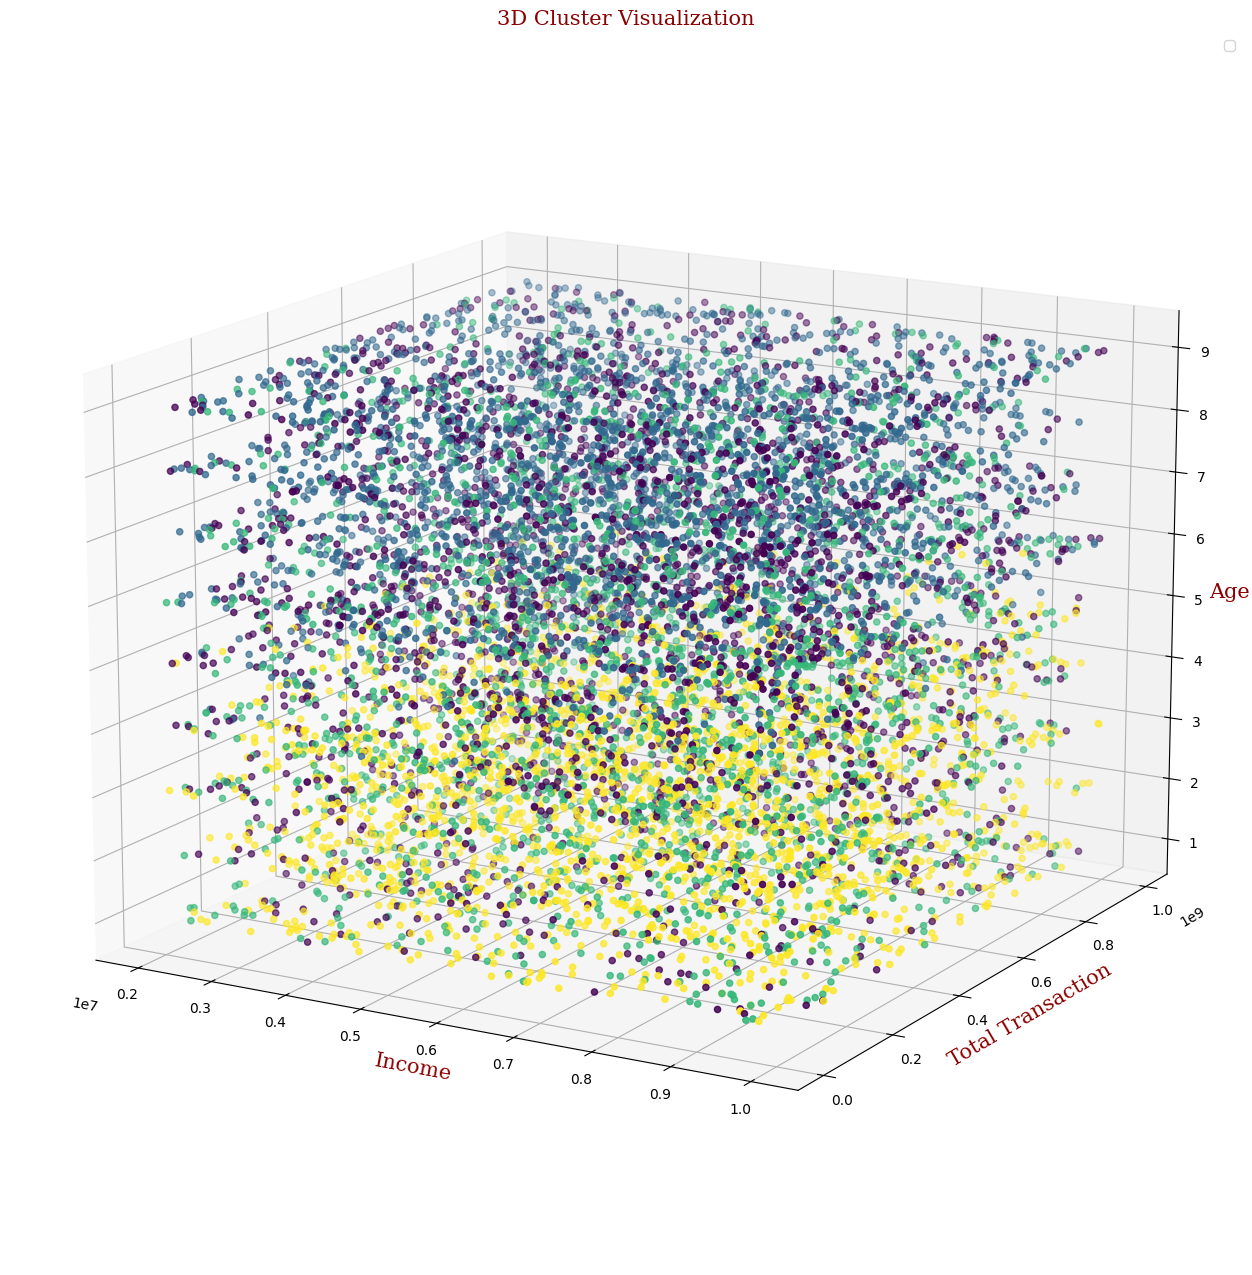

In [25]:
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import matplotlib.pyplot as plt

# Assuming the data is in a pandas DataFrame named 'df_analysis'

# Choose three features for the 3D plot (e.g., income, total_transaction, another feature)
x_feature = 'income'
y_feature = 'total_transaction'
z_feature = 'dob'

fig = plt.figure(figsize=(16, 16))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with color based on cluster
colors = plt.cm.viridis(df_analysis['cluster'].unique())  # Extract colors from viridis

# Scatter plot with color based on cluster
ax.scatter(df_analysis[x_feature], df_analysis[y_feature], df_analysis[z_feature], c=df_analysis['cluster'], cmap='viridis')

font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 15,
        }

# Add labels and title
ax.set_xlabel("Income", fontdict=font)
ax.set_ylabel("Total Transaction", fontdict=font)
ax.set_zlabel("Age", fontdict=font)
plt.title('3D Cluster Visualization', fontdict=font)

# Optional: Customize the plot (viewpoint, legend, etc.)
ax.view_init(elev=15, azim=-60)  # Adjust elevation and azimuth for a better view

# Create a legend mapping colors to cluster labels
legend_labels = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'cluster 3']  # Adjust labels as needed
legend_colors = colors.tolist()  # Convert color values to a list

# Add the legend to the plot
plt.legend(legend_labels, legend_colors)

# Show the plot
plt.show()

In [ ]:
# df_analysis = pd.DataFrame({
#     "bank_id": [7, 8, 9, 7, 8],
#     "dob": [1, 2, 3, 2, 1],
#     "city": [1, 4, 3, 2, 5],
#     "total_transaction": [731064773.0, 787979424.0, 207590810.0, 870578029.0, 686373810.0],
#     "income": [7652685.0, 9305611.0, 3984638.0, 2603126.0, 8529827.0],
#     "cluster": [3, 2, 0, 3, 0]
# })

In [25]:
df_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bank_id            5 non-null      int64  
 1   dob                5 non-null      int64  
 2   city               5 non-null      int64  
 3   total_transaction  5 non-null      float64
 4   income             5 non-null      float64
 5   cluster            5 non-null      int64  
dtypes: float64(2), int64(4)
memory usage: 368.0 bytes


In [14]:
# Group by cluster to understand the characteristics of each segment
cluster_analysis = df_analysis.groupby('cluster').mean()
print(cluster_analysis)

          bank_id       dob      city  total_transaction        income
cluster                                                               
0        2.140551  5.466535  4.189764       5.056630e+08  5.893199e+06
1        4.407853  7.310497  1.801282       5.071187e+08  5.829393e+06
2        5.838121  4.541537  4.180901       5.011138e+08  6.052370e+06
3        3.496231  2.657035  1.784757       4.911100e+08  6.147620e+06


In [15]:
# Calculate the mean values for each feature within each cluster
cluster_analysis = df_analysis.groupby('cluster').mean()

# Add the size of each cluster for reference
cluster_analysis['Cluster_Size'] = df_analysis['cluster'].value_counts()

print("Cluster Summary:\n", cluster_analysis)

# Display the characteristics of each cluster in terms of mean feature values
for cluster_num in range(4):
    print(f"\nCluster {cluster_num}:")
    print(cluster_analysis.loc[cluster_num])
    print("----")

Cluster Summary:
           bank_id       dob      city  total_transaction        income  \
cluster                                                                  
0        2.140551  5.466535  4.189764       5.056630e+08  5.893199e+06   
1        4.407853  7.310497  1.801282       5.071187e+08  5.829393e+06   
2        5.838121  4.541537  4.180901       5.011138e+08  6.052370e+06   
3        3.496231  2.657035  1.784757       4.911100e+08  6.147620e+06   

         Cluster_Size  
cluster                
0                2540  
1                2496  
2                2576  
3                2388  

Cluster 0:
bank_id              2.140551e+00
dob                  5.466535e+00
city                 4.189764e+00
total_transaction    5.056630e+08
income               5.893199e+06
Cluster_Size         2.540000e+03
Name: 0, dtype: float64
----

Cluster 1:
bank_id              4.407853e+00
dob                  7.310497e+00
city                 1.801282e+00
total_transaction    5.071187e+08


In [13]:
summary = {}

for i in range(4):
    summary[i] = df_analysis[df_analysis['cluster'] == i].describe().T
    # .describe method provides general statistics about the data

In [14]:
summary_stats = {}
for cluster in clusters:
    cluster_summary = generate_cluster_summary(cluster)  # Assuming this generates the summary for each cluster
    for feature, value in cluster_summary.items():
        # Replace tuples with strings (e.g., "cluster_1_mean")
        summary_stats[f'{cluster}_{feature}'] = value

NameError: name 'clusters' is not defined

In [48]:
summary_stats = df_analysis\
                .groupby('cluster')\
                .describe()\
                .to_dict()
# summary_stats = df_analysis\
#                 .groupby('cluster')\
#                 .describe()\
#                 .rename_axis("Feature")\
#                 .reset_index()\
#                 .to_dict()
summary_stats

{('bank_id', 'count'): {0: 2540.0, 1: 2496.0, 2: 2576.0, 3: 2388.0},
 ('bank_id', 'mean'): {0: 2.1405511811023623,
  1: 4.407852564102564,
  2: 5.838121118012422,
  3: 3.4962311557788945},
 ('bank_id', 'std'): {0: 1.0003589801405672,
  1: 1.8545082468332625,
  2: 1.012829643082811,
  3: 1.8243989524397286},
 ('bank_id', 'min'): {0: 1.0, 1: 1.0, 2: 4.0, 3: 1.0},
 ('bank_id', '25%'): {0: 1.0, 1: 3.0, 2: 5.0, 3: 2.0},
 ('bank_id', '50%'): {0: 2.0, 1: 4.0, 2: 6.0, 3: 3.0},
 ('bank_id', '75%'): {0: 3.0, 1: 6.0, 2: 7.0, 3: 5.0},
 ('bank_id', 'max'): {0: 4.0, 1: 7.0, 2: 7.0, 3: 7.0},
 ('dob', 'count'): {0: 2540.0, 1: 2496.0, 2: 2576.0, 3: 2388.0},
 ('dob', 'mean'): {0: 5.466535433070866,
  1: 7.310496794871795,
  2: 4.541537267080745,
  3: 2.657035175879397},
 ('dob', 'std'): {0: 2.372727702751104,
  1: 1.3325529589350198,
  2: 2.424755458587614,
  3: 1.3169819582833122},
 ('dob', 'min'): {0: 1.0, 1: 4.0, 2: 1.0, 3: 1.0},
 ('dob', '25%'): {0: 4.0, 1: 6.0, 2: 3.0, 3: 2.0},
 ('dob', '50%'): {0:

### Acuan Encode Data

In [ ]:
# - for dob (age interval) make it hot encode 9 cluster
# 19-22 ---> 1
# 23-26 ---> 2
# 27-30 ---> 3
# 31-34 ---> 4
# 35-38 ---> 5
# 39-42 ---> 6
# 43-46 ---> 7
# 47-50 ---> 8
# 51-54 ---> 9

# - for 'bank_id', encode into:
# '002' (BRI)---> 1
# '008' (Bank Mandiri) ---> 2
# '009' (BNI) ---> 3
# '011' (Bank Danamon)---> 4
# '013' (Bank Permata) ---> 5
# '014' (BCA) ---> 6
# '022' (Bank CIMB Niaga) ---> 7

# - for 'city' encode into
# Bandung ---> 1
# Jakarta ---> 2
# Medan ---> 3
# Semarang ---> 4
# Surabaya ---> 5

### Analysis Cluster 0

In [15]:
summary[0]

,count,mean,std,min,25%,50%,75%,max
bank_id,2540.0,2.140551e+00,1.000359e+00,1.0,1.0,2.0,3.000000e+00,4.0
dob,2540.0,5.466535e+00,2.372728e+00,1.0,4.0,6.0,7.000000e+00,9.0
city,2540.0,4.189764e+00,7.718292e-01,2.0,4.0,4.0,5.000000e+00,5.0
total_transaction,2540.0,5.056630e+08,2.878315e+08,1252258.0,262475000.5,509096872.0,7.608715e+08,999958906.0
income,2540.0,5.893199e+06,2.342588e+06,2003049.0,3842447.5,5842565.0,7.957993e+06,9987040.0
cluster,2540.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0


In [ ]:
# Cluster 0
# Customer hanya bertransaksi pada  Bank ID: 1, 2, 3, 4
# 

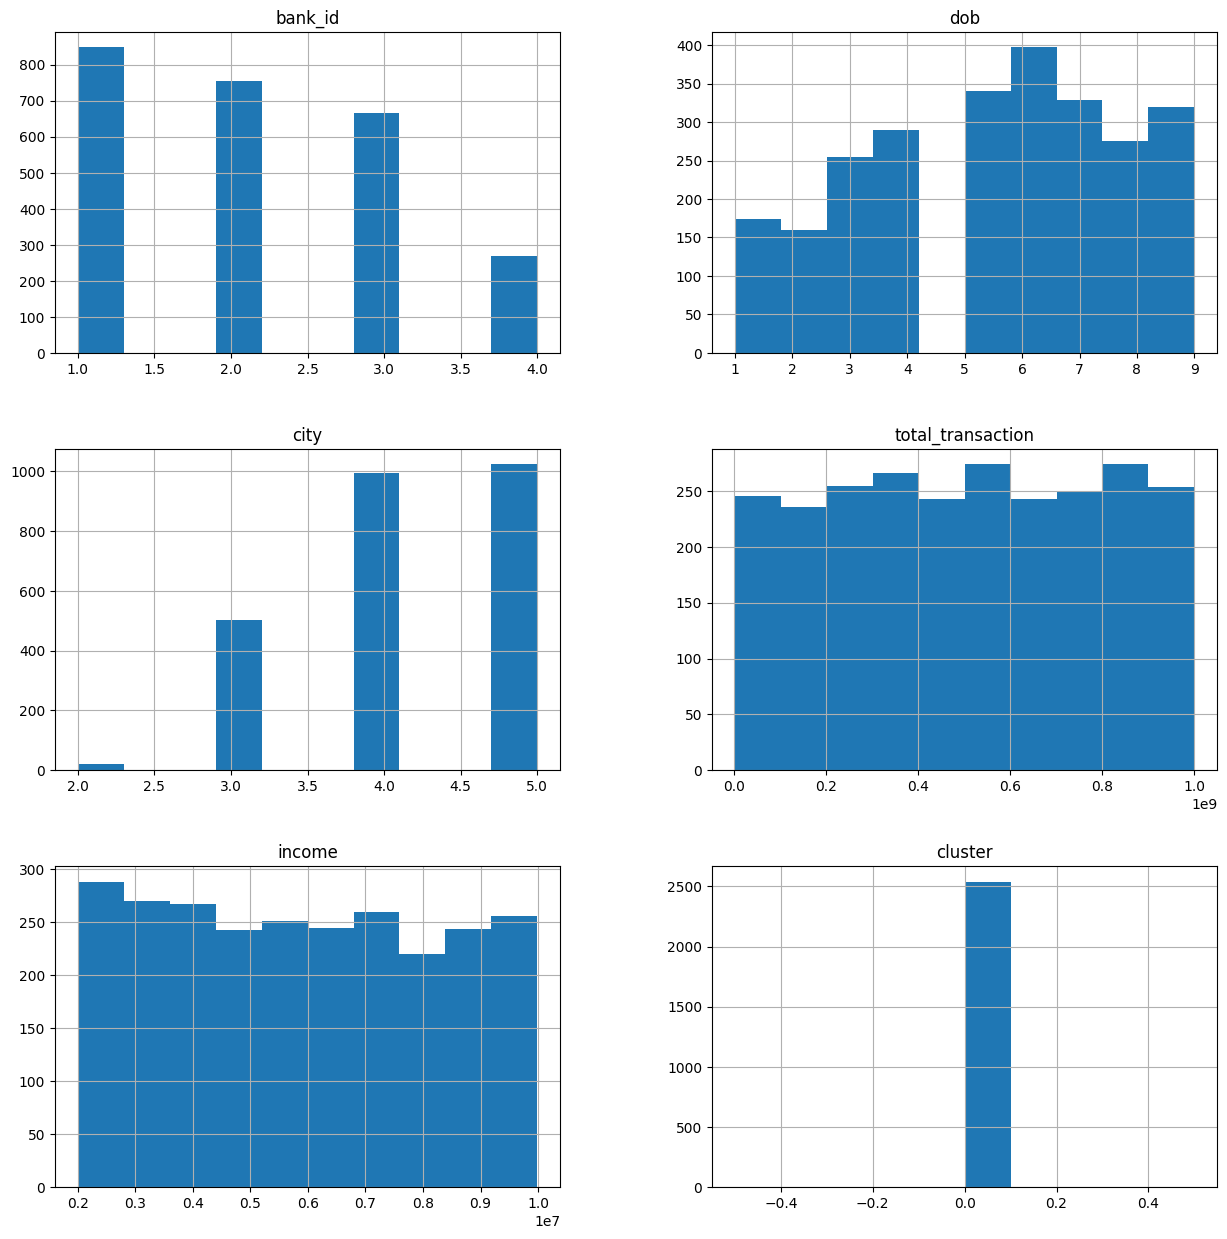

In [18]:
df_analysis[df_analysis['cluster'] == 0].hist(figsize=(15,15));

### Analysis Cluster 1

In [139]:
summary[1]

,count,mean,std,min,25%,50%,75%,max
bank_id,2496.0,4.407853e+00,1.854508e+00,1.0,3.000000e+00,4.0,6.000000e+00,7.0
dob,2496.0,7.310497e+00,1.332553e+00,4.0,6.000000e+00,7.0,8.000000e+00,9.0
city,2496.0,1.801282e+00,7.505338e-01,1.0,1.000000e+00,2.0,2.000000e+00,4.0
total_transaction,2496.0,5.071187e+08,2.872453e+08,1853797.0,2.626838e+08,498693458.5,7.605111e+08,998120618.0
income,2496.0,5.829393e+06,2.301801e+06,2000797.0,3.822946e+06,5717680.0,7.840259e+06,9998155.0
cluster,2496.0,1.000000e+00,0.000000e+00,1.0,1.000000e+00,1.0,1.000000e+00,1.0


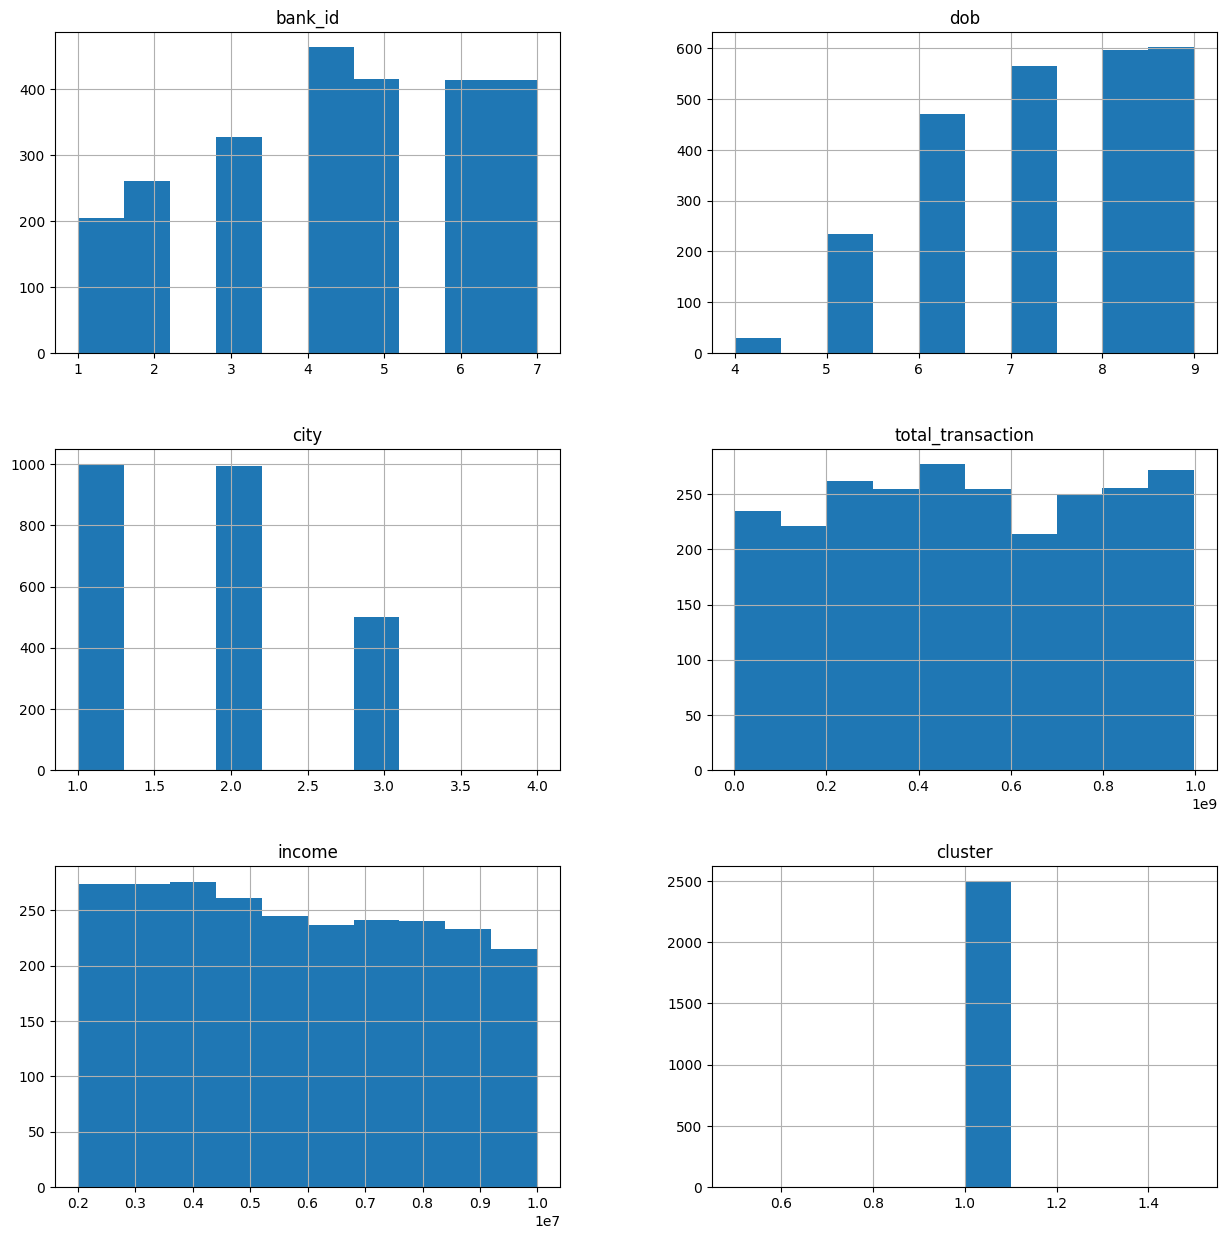

In [140]:
df_analysis[df_analysis['cluster'] == 1].hist(figsize=(15,15));

### Analysis Cluster 2

In [143]:
summary[2]

,count,mean,std,min,25%,50%,75%,max
bank_id,2576.0,5.838121e+00,1.012830e+00,4.0,5.000000e+00,6.0,7.0,7.0
dob,2576.0,4.541537e+00,2.424755e+00,1.0,3.000000e+00,4.0,6.0,9.0
city,2576.0,4.180901e+00,7.802664e-01,2.0,4.000000e+00,4.0,5.0,5.0
total_transaction,2576.0,5.011138e+08,2.893242e+08,1267060.0,2.569869e+08,493541202.0,757547760.5,999817076.0
income,2576.0,6.052370e+06,2.294039e+06,2000430.0,4.127854e+06,6016974.5,8091997.0,9998471.0
cluster,2576.0,2.000000e+00,0.000000e+00,2.0,2.000000e+00,2.0,2.0,2.0


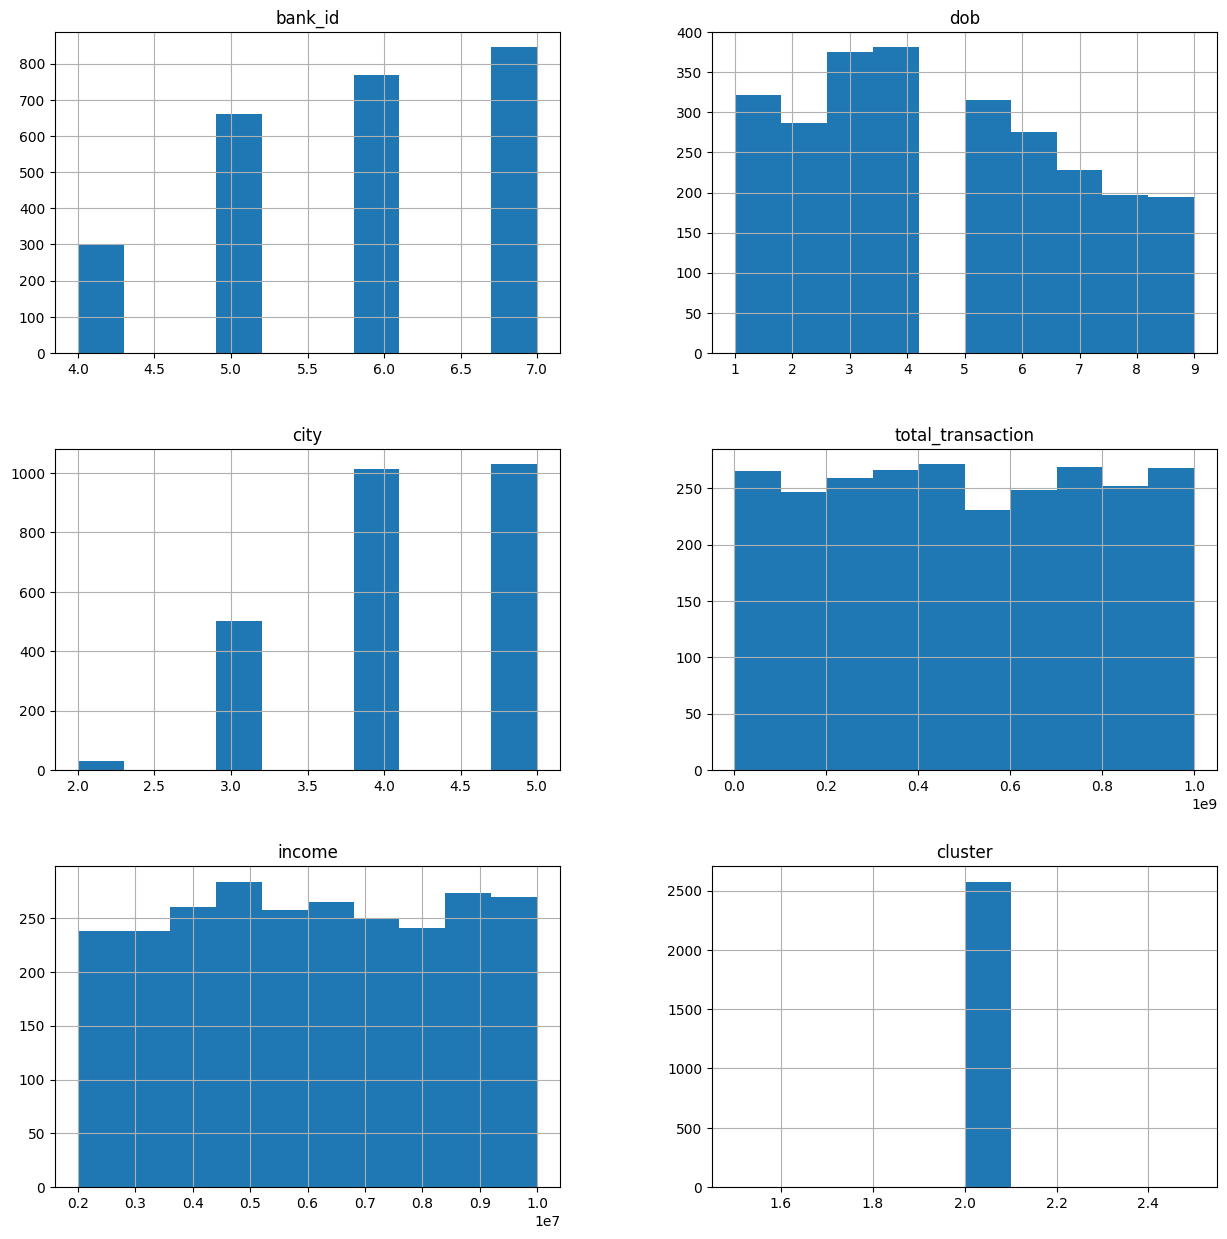

In [144]:
df_analysis[df_analysis['cluster'] == 2].hist(figsize=(15,15));

### Analysis Cluster 3

In [146]:
summary[3]

,count,mean,std,min,25%,50%,75%,max
bank_id,2388.0,3.496231e+00,1.824399e+00,1.0,2.000000e+00,3.0,5.000000e+00,7.0
dob,2388.0,2.657035e+00,1.316982e+00,1.0,2.000000e+00,3.0,4.000000e+00,6.0
city,2388.0,1.784757e+00,7.507475e-01,1.0,1.000000e+00,2.0,2.000000e+00,4.0
total_transaction,2388.0,4.911100e+08,2.893597e+08,1270883.0,2.381220e+08,484906807.5,7.502764e+08,998911319.0
income,2388.0,6.147620e+06,2.303786e+06,2000848.0,4.157226e+06,6243556.0,8.112506e+06,9999899.0
cluster,2388.0,3.000000e+00,0.000000e+00,3.0,3.000000e+00,3.0,3.000000e+00,3.0


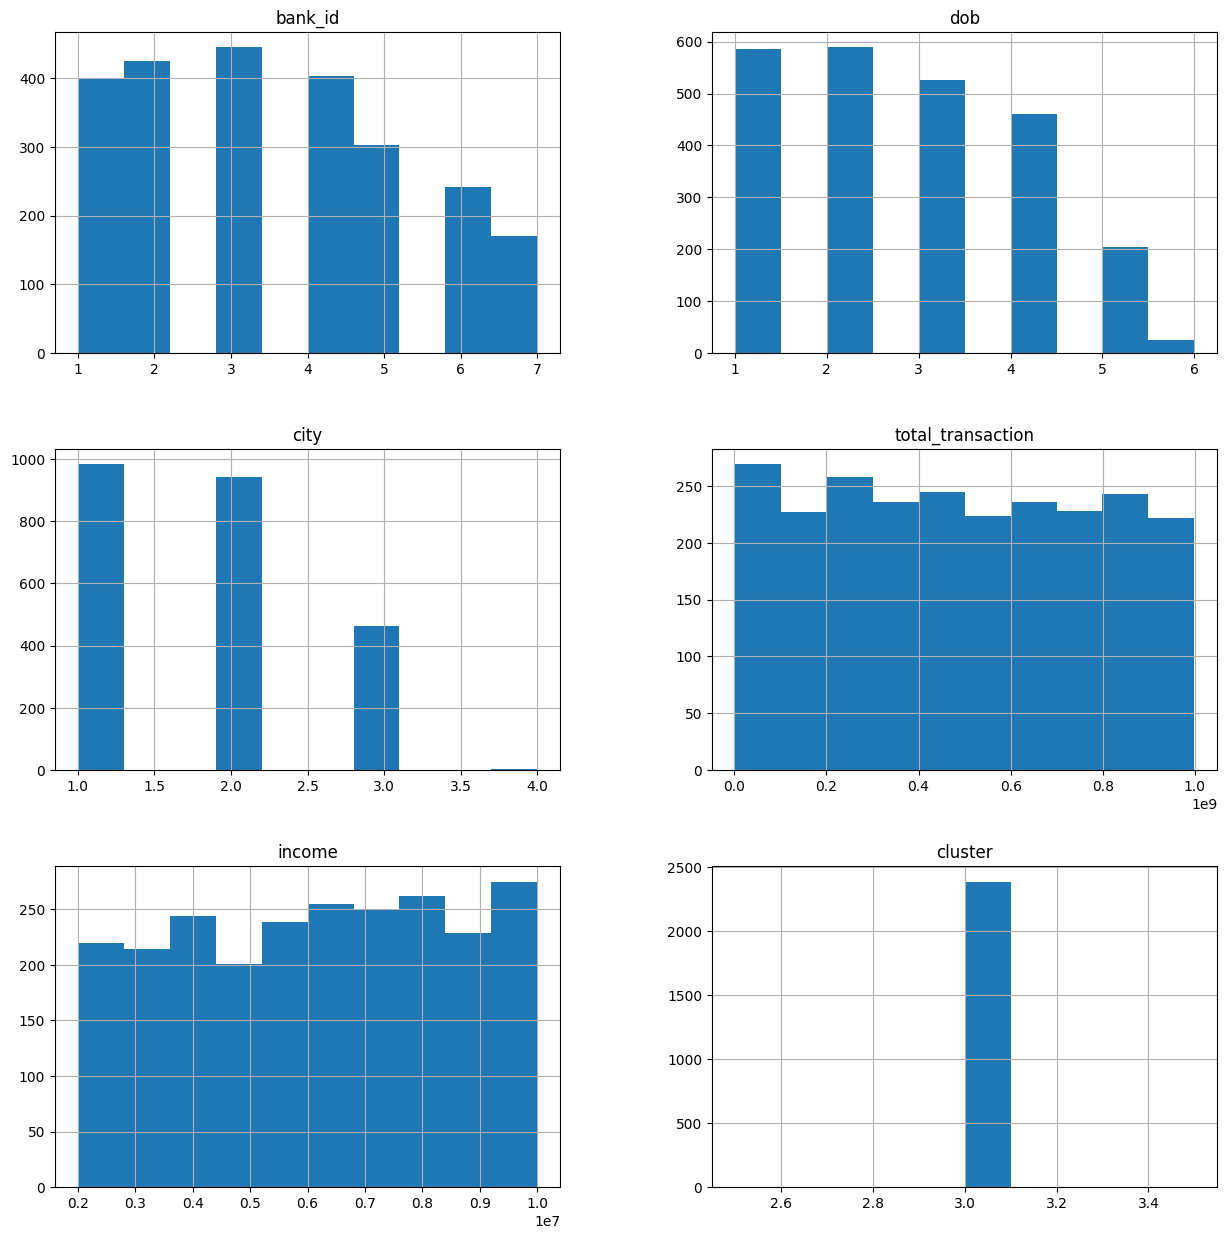

In [145]:
df_analysis[df_analysis['cluster'] == 3].hist(figsize=(15,15));

# Testing Run Model

In [ ]:
# Fungsi dob_encode yang salah logika, selalu mengembalikan nilai 0
def dob_encode(dob):
    age_range_mapping = {
        (19, 22): '19 - 22', (23, 26): '23 - 26', (27, 30): '27 - 30',
        (31, 34): '31 - 34', (35, 38): '35 - 38', (39, 42): '39 - 42', 
        (43, 46): '43 - 46', (47, 50): '47 - 50', (51, 54): '51 - 54'
    }
    age_mapping = {
        '19 - 22': 1, '23 - 26': 2, '27 - 30': 3,
        '31 - 34': 4, '35 - 38': 5, '39 - 42': 6,
        '43 - 46': 7, '47 - 50': 8, '51 - 54': 9
    }
    # age_range = age_range_mapping.get(dob, 0)
    # return age_mapping.get(age_range, 0)
    return age_range_mapping.get(dob, 0)

# dob_encode((43, 46))
dob_encode(60)

0

In [20]:
def dob_encode(dob):
    age_range_mapping = {
        (19, 22): "19 - 22", (23, 26): "23 - 26", (27, 30): "27 - 30",
        (31, 34): "31 - 34", (35, 38): "35 - 38", (39, 42): "39 - 42", 
        (43, 46): "43 - 46", (47, 50): "47 - 50", (51, 54): "51 - 54"
    }
    
    for age_range, label in age_range_mapping.items():
        if age_range[0] <= dob <= age_range[1]:
            return label
    
    # Return None or a default value if dob doesn't fall within any range
    return "Age not in range"

dob_encode(32)

'31 - 34'

In [21]:
def dob_encode(dob):
    age_range_mapping = {
        (19, 22): '19 - 22', (23, 26): '23 - 26', (27, 30): '27 - 30',
        (31, 34): '31 - 34', (35, 38): '35 - 38', (39, 42): '39 - 42', 
        (43, 46): '43 - 46', (47, 50): '47 - 50', (51, 54): '51 - 54'
    }
    age_mapping = {
        '19 - 22': 1, '23 - 26': 2, '27 - 30': 3,
        '31 - 34': 4, '35 - 38': 5, '39 - 42': 6,
        '43 - 46': 7, '47 - 50': 8, '51 - 54': 9
    }

    # Find the correct age range
    for age_range, label in age_range_mapping.items():
        if age_range[0] <= dob <= age_range[1]:
            # Return the encoded integer for the age range
            return age_mapping.get(label, 0)
    
    # Return 0 if dob doesn't fall within any defined range
    return 0

dob_encode(43)

7

7

In [20]:
import pandas as pd
import numpy as np
import json
import joblib
# import cdsw

from joblib import dump
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler_filename = 'scaler.save'
scaler = joblib.load('Scripts/model/' + scaler_filename)
model_filename = 'pii-customer_kmeans_model.joblib'
model = joblib.load('Scripts/model/'+ model_filename)

In [28]:
print(model)
print(scaler)

KMeans(n_clusters=4, n_init=10, random_state=42)
MinMaxScaler()


In [ ]:
def dob_encode(dob):
  age_mapping = {
    '19 - 22': 1, '23 - 26': 2, '27 - 30': 3,
    '31 - 34': 4, '35 - 38': 5, '39 - 42': 6,
    '43 - 46': 7, '47 - 50': 8, '51 - 54': 9
  }
  return age_mapping.get(dob, 0)

def bank_encode(bank_id):
  bank_mapping = {
    '002': 1, '008': 2, '009': 3, '011': 4, 
    '013': 5, '014': 6, '022': 7
  }
  return bank_mapping.get(bank_id, 0)

def city_encode(city):
  city_mapping = {
    'Bandung': 1, 'Jakarta': 2, 'Medan': 3, 
    'Semarang': 4, 'Surabaya': 5
  }
  return city_mapping.get(city, 0)

# Interpretations for each cluster
cluster_interpretations = {
    0: "If assigned to Cluster 0, the new customer likely has characteristics of a mature, financially active individual with high-value transactions.",
    1: "If assigned to Cluster 1, the new customer is likely an older, financially active individual, mostly based in Jakarta, with established banking relationships and higher incomes.",
    2: "If assigned to Cluster 2, the new customer is likely a younger, active customer with moderate to high incomes, residing in areas like Semarang or Jakarta, and engaging in significant transaction volumes.",
    3: "If assigned to Cluster 3, the new customer is likely a young professional in their late 20s, primarily in Jakarta, with diverse transaction levels and stable to high income."
}

def pred_cust_cluster(args):
  dob = args['dob']
  bank_id = args['bank_id']
  city = args['city']
  total_transaction = args['total_transaction']
  income = args['income']
  
  dob = dob_encode(dob)
  bank_id = bank_encode(bank_id)
  city = city_encode(city)
  features = [dob, bank_id, city, \
            total_transaction, income]
  scaled_features = scaler \
      .transform(np.array(features) \
      .reshape(1, -1))
  result = model.predict(scaled_features)
  return {"cluster_customer": result.item()}

# Example input:
#```
#{
#  "dob": '19 - 22', 
#  "bank_id": '022', 
#  "city": 'Jakarta', 
#  "total_transaction": 731064773, 
#  "income": 7652685 
#}
#```

# Example output:
#```
#{"customer_cluster": 7}
#```

In [1]:
def f(a, b):
    return a % b

result = 0
for i in range(1, 11):
    if f(i, 2) == 0:
        result = result + i
    else:
        result = result - i
print(result)

5


In [3]:
2 % 2

0

# MLFlow

In [5]:
import math
from datetime import datetime, timedelta

import numpy as np
import optuna
import pandas as pd
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

import mlflow

In [14]:
def generate_apple_sales_data_with_promo_adjustment(
    base_demand: int = 1000,
    n_rows: int = 5000,
    competitor_price_effect: float = -50.0,
):
    """
    Generates a synthetic dataset for predicting apple sales demand with multiple
    influencing factors.

    This function creates a pandas DataFrame with features relevant to apple sales.
    The features include date, average_temperature, rainfall, weekend flag, holiday flag,
    promotional flag, price_per_kg, competitor's price, marketing intensity, stock availability,
    and the previous day's demand. The target variable, 'demand', is generated based on a
    combination of these features with some added noise.

    Args:
        base_demand (int, optional): Base demand for apples. Defaults to 1000.
        n_rows (int, optional): Number of rows (days) of data to generate. Defaults to 5000.
        competitor_price_effect (float, optional): Effect of competitor's price being lower
                                                   on our sales. Defaults to -50.

    Returns:
        pd.DataFrame: DataFrame with features and target variable for apple sales prediction.

    Example:
        >>> df = generate_apple_sales_data_with_promo_adjustment(base_demand=1200, n_rows=6000)
        >>> df.head()
    """

    # Set seed for reproducibility
    np.random.seed(9999)

    # Create date range
    dates = [datetime.now() - timedelta(days=i) for i in range(n_rows)]
    dates.reverse()

    # Generate features
    df = pd.DataFrame(
        {
            "date": dates,
            "average_temperature": np.random.uniform(10, 35, n_rows),
            "rainfall": np.random.exponential(5, n_rows),
            "weekend": [(date.weekday() >= 5) * 1 for date in dates],
            "holiday": np.random.choice([0, 1], n_rows, p=[0.97, 0.03]),
            "price_per_kg": np.random.uniform(0.5, 3, n_rows),
            "month": [date.month for date in dates],
        }
    )

    # Introduce inflation over time (years)
    df["inflation_multiplier"] = 1 + (df["date"].dt.year - df["date"].dt.year.min()) * 0.03

    # Incorporate seasonality due to apple harvests
    df["harvest_effect"] = np.sin(2 * np.pi * (df["month"] - 3) / 12) + np.sin(
        2 * np.pi * (df["month"] - 9) / 12
    )

    # Modify the price_per_kg based on harvest effect
    df["price_per_kg"] = df["price_per_kg"] - df["harvest_effect"] * 0.5

    # Adjust promo periods to coincide with periods lagging peak harvest by 1 month
    peak_months = [4, 10]  # months following the peak availability
    df["promo"] = np.where(
        df["month"].isin(peak_months),
        1,
        np.random.choice([0, 1], n_rows, p=[0.85, 0.15]),
    )

    # Generate target variable based on features
    base_price_effect = -df["price_per_kg"] * 50
    seasonality_effect = df["harvest_effect"] * 50
    promo_effect = df["promo"] * 200

    df["demand"] = (
        base_demand
        + base_price_effect
        + seasonality_effect
        + promo_effect
        + df["weekend"] * 300
        + np.random.normal(0, 50, n_rows)
    ) * df["inflation_multiplier"]  # adding random noise

    # Add previous day's demand
    df["previous_days_demand"] = df["demand"].shift(1)
    df["previous_days_demand"].fillna(method="bfill", inplace=True)  # fill the first row

    # Introduce competitor pricing
    df["competitor_price_per_kg"] = np.random.uniform(0.5, 3, n_rows)
    df["competitor_price_effect"] = (
        df["competitor_price_per_kg"] < df["price_per_kg"]
    ) * competitor_price_effect

    # Stock availability based on past sales price (3 days lag with logarithmic decay)
    log_decay = -np.log(df["price_per_kg"].shift(3) + 1) + 2
    df["stock_available"] = np.clip(log_decay, 0.7, 1)

    # Marketing intensity based on stock availability
    # Identify where stock is above threshold
    high_stock_indices = df[df["stock_available"] > 0.95].index

    # For each high stock day, increase marketing intensity for the next week
    for idx in high_stock_indices:
        df.loc[idx : min(idx + 7, n_rows - 1), "marketing_intensity"] = np.random.uniform(0.7, 1)

    # If the marketing_intensity column already has values, this will preserve them;
    #  if not, it sets default values
    fill_values = pd.Series(np.random.uniform(0, 0.5, n_rows), index=df.index)
    df["marketing_intensity"].fillna(fill_values, inplace=True)

    # Adjust demand with new factors
    df["demand"] = df["demand"] + df["competitor_price_effect"] + df["marketing_intensity"]

    # Drop temporary columns
    df.drop(
        columns=[
            "inflation_multiplier",
            "harvest_effect",
            "month",
            "competitor_price_effect",
            "stock_available",
        ],
        inplace=True,
    )

    return df

In [15]:
df = generate_apple_sales_data_with_promo_adjustment(base_demand=1_000, n_rows=5000)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_3496\1129670120.py:85: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["previous_days_demand"].fillna(method="bfill", inplace=True)  # fill the first row
C:\Users\ASUS\AppData\Local\Temp\ipykernel_3496\1129670120.py:85: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["previous_days_demand"].fillna(method="bfill", inplace=True)  # fill the first row
C:\Users\ASUS\AppData\Local\Temp\ipykernel_3496

In [17]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   date                     5000 non-null   datetime64[ns]
 1   average_temperature      5000 non-null   float64       
 2   rainfall                 5000 non-null   float64       
 3   weekend                  5000 non-null   int64         
 4   holiday                  5000 non-null   int64         
 5   price_per_kg             5000 non-null   float64       
 6   promo                    5000 non-null   int64         
 7   demand                   5000 non-null   float64       
 8   previous_days_demand     5000 non-null   float64       
 9   competitor_price_per_kg  5000 non-null   float64       
 10  marketing_intensity      5000 non-null   float64       
dtypes: datetime64[ns](1), float64(7), int64(3)
memory usage: 429.8 KB


In [9]:
df.to_csv("apple_sales_data_with_promo_adjustment.csv", index=False)

In [22]:
df = pd.read_csv("apple_sales_data_with_promo_adjustment.csv")
df.head(3)

,date,average_temperature,rainfall,weekend,holiday,price_per_kg,promo,demand,previous_days_demand,competitor_price_per_kg,marketing_intensity
0,2011-03-16 11:55:09.660010,30.584727,1.199291,0,0,1.726258,0,851.375336,851.276659,1.935346,0.098677
1,2011-03-17 11:55:09.660010,15.465069,1.037626,0,0,0.576471,0,906.855943,851.276659,2.344720,0.019318
2,2011-03-18 11:55:09.660010,10.786525,5.656089,0,0,2.513328,0,808.304909,906.836626,0.998803,0.409485


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   date                     5000 non-null   object 
 1   average_temperature      5000 non-null   float64
 2   rainfall                 5000 non-null   float64
 3   weekend                  5000 non-null   int64  
 4   holiday                  5000 non-null   int64  
 5   price_per_kg             5000 non-null   float64
 6   promo                    5000 non-null   int64  
 7   demand                   5000 non-null   float64
 8   previous_days_demand     5000 non-null   float64
 9   competitor_price_per_kg  5000 non-null   float64
 10  marketing_intensity      5000 non-null   float64
dtypes: float64(7), int64(3), object(1)
memory usage: 429.8+ KB


In [ ]:
# import pandas as pd

# # Example DataFrame
# data = {
#     "date_column": ["2011-03-16 11:55:09.660010", "2012-06-12 10:45:00", "2015-07-19 14:30:00"],
#     "value": [10, 20, 30],
# }
# df = pd.DataFrame(data)

# # Convert the date column from object to datetime64[ns]
# df["date_column"] = pd.to_datetime(df["date_column"], format='mixed')

# # Check the result
# print(df.dtypes)
# df

date_column    datetime64[ns]
value                   int64
dtype: object


,date_column,value
0,2011-03-16 11:55:09.660010,10
1,2012-06-12 10:45:00.000000,20
2,2015-07-19 14:30:00.000000,30


In [24]:
df.columns

Index(['date', 'average_temperature', 'rainfall', 'weekend', 'holiday',
       'price_per_kg', 'promo', 'demand', 'previous_days_demand',
       'competitor_price_per_kg', 'marketing_intensity'],
      dtype='object')

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns


def plot_correlation_with_demand(df, save_path=None):  # noqa: D417
    """
    Plots the correlation of each variable in the dataframe with the 'demand' column.

    Args:
    - df (pd.DataFrame): DataFrame containing the data, including a 'demand' column.
    - save_path (str, optional): Path to save the generated plot. If not specified, plot won't be saved.

    Returns:
    - None (Displays the plot on a Jupyter window)
    """
    # Convert the date column from object to datetime64[ns]
    df["date"] = pd.to_datetime(df["date"], format='mixed')

    # Compute correlations between all variables and 'demand'
    correlations = df.corr()["demand"].drop("demand").sort_values()

    # Generate a color palette from red to green
    colors = sns.diverging_palette(10, 130, as_cmap=True)
    color_mapped = correlations.map(colors)

    # Set Seaborn style
    sns.set_style(
        "whitegrid", {"axes.facecolor": "#c2c4c2", "grid.linewidth": 1.5}
    )  # Light grey background and thicker grid lines

    # Create bar plot
    fig = plt.figure(figsize=(12, 8))
    plt.barh(correlations.index, correlations.values, color=color_mapped)

    # Set labels and title with increased font size
    plt.title("Correlation with Demand", fontsize=18)
    plt.xlabel("Correlation Coefficient", fontsize=16)
    plt.ylabel("Variable", fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.grid(axis="x")

    plt.tight_layout()

    # Save the plot if save_path is specified
    if save_path:
        plt.savefig(save_path, format="png", dpi=600)

    # prevent matplotlib from displaying the chart every time we call this function
    plt.close(fig)

    return fig

In [26]:
# Test the function
correlation_plot = plot_correlation_with_demand(df, save_path="correlation_plot.png")

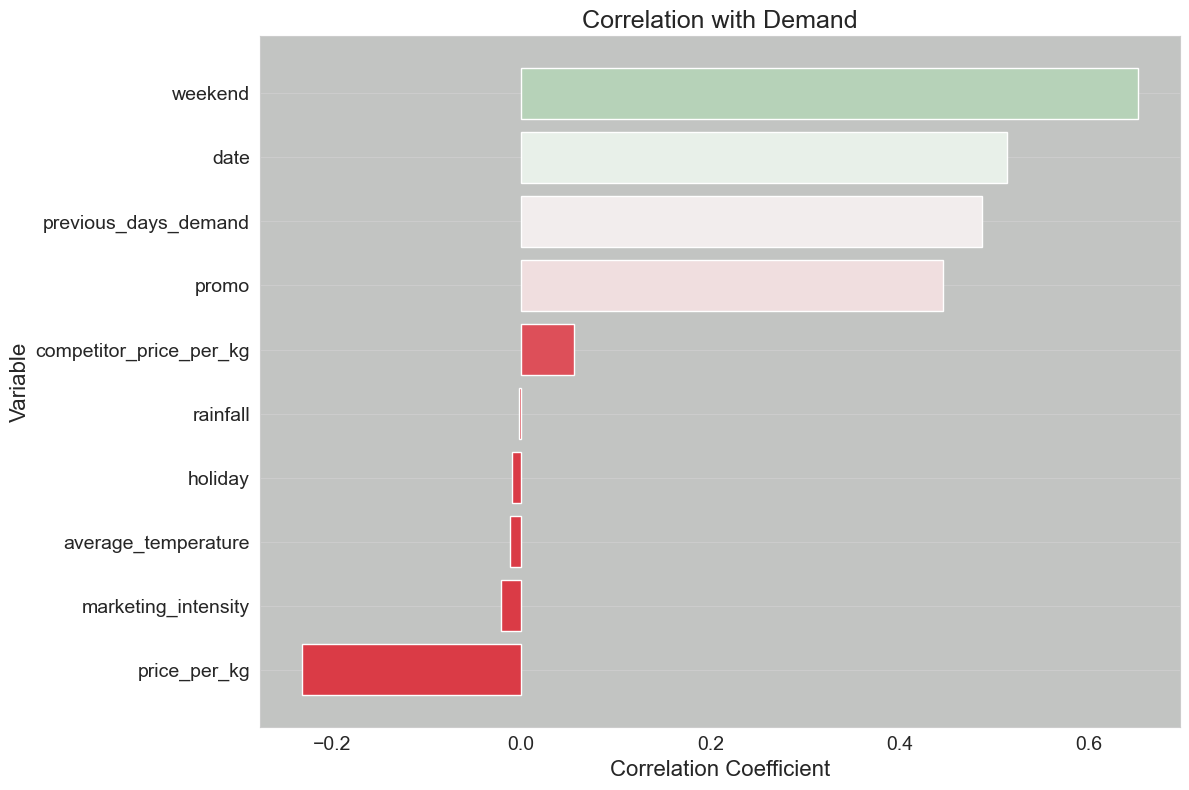

In [28]:
correlation_plot

In [29]:
def plot_residuals(model, dvalid, valid_y, save_path=None):  # noqa: D417
    """
    Plots the residuals of the model predictions against the true values.

    Args:
    - model: The trained XGBoost model.
    - dvalid (xgb.DMatrix): The validation data in XGBoost DMatrix format.
    - valid_y (pd.Series): The true values for the validation set.
    - save_path (str, optional): Path to save the generated plot. If not specified, plot won't be saved.

    Returns:
    - None (Displays the residuals plot on a Jupyter window)
    """

    # Predict using the model
    preds = model.predict(dvalid)

    # Calculate residuals
    residuals = valid_y - preds

    # Set Seaborn style
    sns.set_style("whitegrid", {"axes.facecolor": "#c2c4c2", "grid.linewidth": 1.5})

    # Create scatter plot
    fig = plt.figure(figsize=(12, 8))
    plt.scatter(valid_y, residuals, color="blue", alpha=0.5)
    plt.axhline(y=0, color="r", linestyle="-")

    # Set labels, title and other plot properties
    plt.title("Residuals vs True Values", fontsize=18)
    plt.xlabel("True Values", fontsize=16)
    plt.ylabel("Residuals", fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.grid(axis="y")

    plt.tight_layout()

    # Save the plot if save_path is specified
    if save_path:
        plt.savefig(save_path, format="png", dpi=600)

    # Show the plot
    plt.close(fig)

    return fig

In [30]:
def plot_feature_importance(model, booster):  # noqa: D417
    """
    Plots feature importance for an XGBoost model.

    Args:
    - model: A trained XGBoost model

    Returns:
    - fig: The matplotlib figure object
    """
    fig, ax = plt.subplots(figsize=(10, 8))
    importance_type = "weight" if booster == "gblinear" else "gain"
    xgb.plot_importance(
        model,
        importance_type=importance_type,
        ax=ax,
        title=f"Feature Importance based on {importance_type}",
    )
    plt.tight_layout()
    plt.close(fig)

    return fig

In [31]:
def get_or_create_experiment(experiment_name):
    """
    Retrieve the ID of an existing MLflow experiment or create a new one if it doesn't exist.

    This function checks if an experiment with the given name exists within MLflow.
    If it does, the function returns its ID. If not, it creates a new experiment
    with the provided name and returns its ID.

    Parameters:
    - experiment_name (str): Name of the MLflow experiment.

    Returns:
    - str: ID of the existing or newly created MLflow experiment.
    """

    if experiment := mlflow.get_experiment_by_name(experiment_name):
        return experiment.experiment_id
    else:
        return mlflow.create_experiment(experiment_name)

In [32]:
experiment_id = get_or_create_experiment("Apples Demand")

In [33]:
experiment_id

'401433165204753081'

In [34]:
# Set the current active MLflow experiment
mlflow.set_experiment(experiment_id=experiment_id)

# Preprocess the dataset
X = df.drop(columns=["date", "demand"])
y = df["demand"]
train_x, valid_x, train_y, valid_y = train_test_split(X, y, test_size=0.25)
dtrain = xgb.DMatrix(train_x, label=train_y)
dvalid = xgb.DMatrix(valid_x, label=valid_y)

In [35]:
# override Optuna's default logging to ERROR only
optuna.logging.set_verbosity(optuna.logging.ERROR)

# define a logging callback that will report on only new challenger parameter configurations if a
# trial has usurped the state of 'best conditions'


def champion_callback(study, frozen_trial):
    """
    Logging callback that will report when a new trial iteration improves upon existing
    best trial values.

    Note: This callback is not intended for use in distributed computing systems such as Spark
    or Ray due to the micro-batch iterative implementation for distributing trials to a cluster's
    workers or agents.
    The race conditions with file system state management for distributed trials will render
    inconsistent values with this callback.
    """

    winner = study.user_attrs.get("winner", None)

    if study.best_value and winner != study.best_value:
        study.set_user_attr("winner", study.best_value)
        if winner:
            improvement_percent = (abs(winner - study.best_value) / study.best_value) * 100
            print(
                f"Trial {frozen_trial.number} achieved value: {frozen_trial.value} with "
                f"{improvement_percent: .4f}% improvement"
            )
        else:
            print(f"Initial trial {frozen_trial.number} achieved value: {frozen_trial.value}")

In [36]:
def objective(trial):
    with mlflow.start_run(nested=True):
        # Define hyperparameters
        params = {
            "objective": "reg:squarederror",
            "eval_metric": "rmse",
            "booster": trial.suggest_categorical("booster", ["gbtree", "gblinear", "dart"]),
            "lambda": trial.suggest_float("lambda", 1e-8, 1.0, log=True),
            "alpha": trial.suggest_float("alpha", 1e-8, 1.0, log=True),
        }

        if params["booster"] == "gbtree" or params["booster"] == "dart":
            params["max_depth"] = trial.suggest_int("max_depth", 1, 9)
            params["eta"] = trial.suggest_float("eta", 1e-8, 1.0, log=True)
            params["gamma"] = trial.suggest_float("gamma", 1e-8, 1.0, log=True)
            params["grow_policy"] = trial.suggest_categorical(
                "grow_policy", ["depthwise", "lossguide"]
            )

        # Train XGBoost model
        bst = xgb.train(params, dtrain)
        preds = bst.predict(dvalid)
        error = mean_squared_error(valid_y, preds)

        # Log to MLflow
        mlflow.log_params(params)
        mlflow.log_metric("mse", error)
        mlflow.log_metric("rmse", math.sqrt(error))

    return error

In [37]:
run_name = "first_attempt"

In [38]:
# Initiate the parent run and call the hyperparameter tuning child run logic
with mlflow.start_run(experiment_id=experiment_id, run_name=run_name, nested=True):
    # Initialize the Optuna study
    study = optuna.create_study(direction="minimize")

    # Execute the hyperparameter optimization trials.
    # Note the addition of the `champion_callback` inclusion to control our logging
    study.optimize(objective, n_trials=500, callbacks=[champion_callback])

    mlflow.log_params(study.best_params)
    mlflow.log_metric("best_mse", study.best_value)
    mlflow.log_metric("best_rmse", math.sqrt(study.best_value))

    # Log tags
    mlflow.set_tags(
        tags={
            "project": "Apple Demand Project",
            "optimizer_engine": "optuna",
            "model_family": "xgboost",
            "feature_set_version": 1,
        }
    )

    # Log a fit model instance
    model = xgb.train(study.best_params, dtrain)

    # Log the correlation plot
    mlflow.log_figure(figure=correlation_plot, artifact_file="correlation_plot.png")

    # Log the feature importances plot
    importances = plot_feature_importance(model, booster=study.best_params.get("booster"))
    mlflow.log_figure(figure=importances, artifact_file="feature_importances.png")

    # Log the residuals plot
    residuals = plot_residuals(model, dvalid, valid_y)
    mlflow.log_figure(figure=residuals, artifact_file="residuals.png")

    artifact_path = "model"

    mlflow.xgboost.log_model(
        xgb_model=model,
        artifact_path=artifact_path,
        input_example=train_x.iloc[[0]],
        model_format="ubj",
        metadata={"model_data_version": 1},
    )

    # Get the logged model uri so that we can load it from the artifact store
    model_uri = mlflow.get_artifact_uri(artifact_path)

Initial trial 0 achieved value: 62654.12919331924
Trial 2 achieved value: 19698.89761779671 with  218.0591% improvement
Trial 10 achieved value: 19469.209671698947 with  1.1797% improvement
Trial 14 achieved value: 19320.42619499933 with  0.7701% improvement
Trial 27 achieved value: 19235.111588070853 with  0.4435% improvement
Trial 29 achieved value: 16457.736726089865 with  16.8758% improvement
Trial 30 achieved value: 15027.980974419383 with  9.5140% improvement
Trial 51 achieved value: 14884.878056694972 with  0.9614% improvement
Trial 52 achieved value: 14833.54883752386 with  0.3460% improvement
Trial 56 achieved value: 14685.873959880444 with  1.0056% improvement
Trial 99 achieved value: 14683.95195535149 with  0.0131% improvement
Trial 111 achieved value: 14571.215190509844 with  0.7737% improvement
Trial 122 achieved value: 14565.661739339394 with  0.0381% improvement
Trial 131 achieved value: 14517.80802255142 with  0.3296% improvement
Trial 188 achieved value: 14516.76735926

c:\Users\ASUS\.pyenv\pyenv-win\versions\3.10.5\lib\site-packages\mlflow\types\utils.py:407: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(


In [39]:
model_uri

'file:///c:/Users/ASUS/OneDrive%20-%20Universitas%20Diponegoro/Cari%20Kerja/PT%20Data%20Labs%20Analytics%20%28datalabs.id%29/4.%20Use%20Case%20Projects/Training%20Project%20Customer%20Segmentation/mlruns/401433165204753081/8780869353054a25a83b58f457ed4bad/artifacts/model'

In [40]:
loaded = mlflow.xgboost.load_model(model_uri)

In [41]:
batch_dmatrix = xgb.DMatrix(X)

inference = loaded.predict(batch_dmatrix)

infer_df = df.copy()

infer_df["predicted_demand"] = inference

In [42]:
infer_df

,date,average_temperature,rainfall,weekend,holiday,price_per_kg,promo,demand,previous_days_demand,competitor_price_per_kg,marketing_intensity,predicted_demand
0,2011-03-16 11:55:09.660010,30.584727,1.199291,0,0,1.726258,0,851.375336,851.276659,1.935346,0.098677,956.733093
1,2011-03-17 11:55:09.660010,15.465069,1.037626,0,0,0.576471,0,906.855943,851.276659,2.344720,0.019318,962.535767
2,2011-03-18 11:55:09.660010,10.786525,5.656089,0,0,2.513328,0,808.304909,906.836626,0.998803,0.409485,823.158875
3,2011-03-19 11:55:09.660010,23.648154,12.030937,1,0,1.839225,0,1099.833810,857.895424,0.761740,0.872803,1240.751343
4,2011-03-20 11:55:09.660010,13.861391,4.303812,1,0,1.531772,0,1283.949061,1148.961007,2.123436,0.820779,1450.324707
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2024-11-17 11:55:09.639794,21.643051,3.821656,1,0,2.391010,0,1557.210762,1563.064082,1.504432,0.756489,1377.375854
4996,2024-11-18 11:55:09.639794,13.808813,1.080603,0,1,0.898693,0,1285.149505,1606.454273,1.343586,0.742145,1205.171143
4997,2024-11-19 11:55:09.639794,11.698227,1.911000,0,0,2.839860,0,965.171368,1284.407359,2.771896,0.742145,1067.908569
4998,2024-11-20 11:55:09.639794,18.052081,1.000521,0,0,1.188440,0,1368.369501,1014.429223,2.564075,0.742145,1098.148193
